In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Comenzamos importando los datos y viendo, primer lugar, donde encontramos los NAN.

In [71]:
fruits = pd.read_csv("fruits.csv")
fruits

Unnamed: 0  weight    length  width  regularity       cleft
0             0   1.205  4.603915  2.847    5.691634       Small
1             1   1.726  5.978000  3.594    4.539000       Large
2             2   1.126  4.516534  2.710    5.965993     Average
3             3   1.755  5.791000  3.690    5.366000       Large
4             4   1.238  4.666888  2.989    6.153947       Small
..          ...     ...       ...    ...         ...         ...
175         175   1.345       NaN  3.065    3.531000  Very small
176         176   1.237  4.508595  2.960    4.655452       Small
177         177   1.437  5.569000  3.153    1.464000     Average
178         178   1.273  5.412000  2.882    3.533000  Very small
179         179   1.480  5.656000  3.288    3.112000     Average

[180 rows x 6 columns]

In [72]:
fruits = pd.read_csv("fruits.csv")
fruits.drop("Unnamed: 0", axis=1, inplace=True)
fruits

weight    length  width  regularity       cleft
0     1.205  4.603915  2.847    5.691634       Small
1     1.726  5.978000  3.594    4.539000       Large
2     1.126  4.516534  2.710    5.965993     Average
3     1.755  5.791000  3.690    5.366000       Large
4     1.238  4.666888  2.989    6.153947       Small
..      ...       ...    ...         ...         ...
175   1.345       NaN  3.065    3.531000  Very small
176   1.237  4.508595  2.960    4.655452       Small
177   1.437  5.569000  3.153    1.464000     Average
178   1.273  5.412000  2.882    3.533000  Very small
179   1.480  5.656000  3.288    3.112000     Average

[180 rows x 5 columns]

In [73]:
not_nan = fruits.count()
columns = fruits.columns

for i in range(5):
    print("Number of NAN in", columns[i], ":", 180 - not_nan[i])


Number of NAN in weight : 12
Number of NAN in length : 24
Number of NAN in width : 17
Number of NAN in regularity : 10
Number of NAN in cleft : 0


Vemos que hay NAN en todas las columnas menos en la columna de cleft, por lo que vamos a tener que pensar una forma de computar esos valores missing.

Ahora vamos a estudiar los datos numéricos que tenemos para buscar datos atípicos.

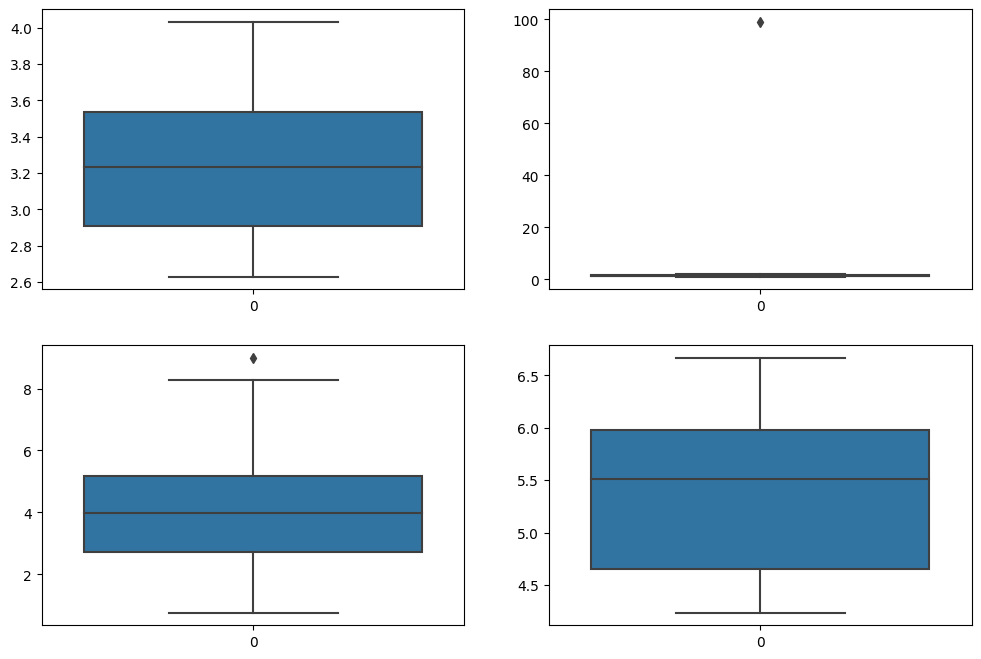

In [74]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(fruits["width"])

plt.subplot(2, 2, 2)
sns.boxplot(fruits["weight"])

plt.subplot(2, 2, 3)
sns.boxplot(fruits["regularity"])

plt.subplot(2, 2, 4)
sns.boxplot(fruits["length"])

plt.show()


Vemos claramente que en las columnas de weight y regularity hay valores atípicos, en concreto, hay uno en cada columna. El valor weight es claramente atípico y lo más probable es que venga de una medida errónea o de algún otro error, ya que no es factible su aparición. Sin embargo, el atípico de regularity no parece tan extraño, ya que aunque esta bastante alejado de la media, es mas creible que sea un elemento que simplemente era atípico, pero que debemos tener en cuenta también para nuestro proyecto.

Una vez realizado este estudio, ya sabemos que tenemos que imputar tanto los NAN como el atípico que tenemos en la variable Weigth. El siguiente paso es discutir como vamos a imputar estos datos. Viendo como son los datos, creemos que la mejor forma de imputarlos es a través del método de K vecinos más cercanos, usando las variables numéricas de nuestro dataset.

In [75]:
#Ubicamos el dato atípico que queremos eliminar y lo pasamos a NAN
print(fruits[fruits["weight"] >= 10])

fruits["weight"][61] = np.nan

print(fruits[fruits["weight"] >= 10])


    weight  length  width  regularity       cleft
61    99.0   6.173  3.651       2.443  Very large
Empty DataFrame
Columns: [weight, length, width, regularity, cleft]
Index: []


<ipython-input-75-3662671eae58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruits["weight"][61] = np.nan


In [76]:
fruits

weight    length  width  regularity       cleft
0     1.205  4.603915  2.847    5.691634       Small
1     1.726  5.978000  3.594    4.539000       Large
2     1.126  4.516534  2.710    5.965993     Average
3     1.755  5.791000  3.690    5.366000       Large
4     1.238  4.666888  2.989    6.153947       Small
..      ...       ...    ...         ...         ...
175   1.345       NaN  3.065    3.531000  Very small
176   1.237  4.508595  2.960    4.655452       Small
177   1.437  5.569000  3.153    1.464000     Average
178   1.273  5.412000  2.882    3.533000  Very small
179   1.480  5.656000  3.288    3.112000     Average

[180 rows x 5 columns]

In [77]:
from sklearn.impute import SimpleImputer

simpleImp = SimpleImputer(missing_values=np.nan, strategy="mean")
simpleImp.fit(fruits[["weight","length","width", "regularity"]])
fruits_impute_simple = simpleImp.transform(fruits[["weight","length","width", "regularity"]])
print("Simple Imputer: ", fruits_impute_simple[175][1])

Simple Imputer:  5.3824124004494776


In [78]:
from sklearn.impute import KNNImputer

neighbours = [3, 5, 7, 9, 11, 13, 15]

for neighbour in neighbours:

    imputer = KNNImputer(n_neighbors=neighbour, weights="uniform")
    imputer.fit(fruits[["weight","length","width", "regularity"]])

    fruits_impute_k=imputer.transform(fruits[["weight", "length", "width", "regularity"]])
    print("KNN Imputer with K = ",neighbour, ": ",fruits_impute_k[175][1])

KNN Imputer with K =  3 :  5.315678295661525
KNN Imputer with K =  5 :  5.372606977396915
KNN Imputer with K =  7 :  5.385147840997796
KNN Imputer with K =  9 :  5.207621692075332
KNN Imputer with K =  11 :  5.181689660442592
KNN Imputer with K =  13 :  5.259352789605269
KNN Imputer with K =  15 :  5.216447020866943


Comparando los dos imputadores que hemos usado, tanto el Simple Imputer como el KNN Imputer, y viendo como afectan a los valores imputados, vamos a elegir el KNN Imputer con K = 5. La razón para elegir el KNN Imputer en lugar del Simple Imputer es que el primero nos permite predecir mejor el dato gracias a las otras variables de las que si conocemos el valor, mientras que el Simple Imputer tan solo va a tomar en cuenta una de las variables.
La razón por la que hemos escogido el K = 5 está más relacionada con evitar los valores K muy altos, ya que esto tendería más a generalizar el resultado, y también está relacionada con evitar los K muy bajos, ya que esto puede provocar que nuestra aproximación del valor sea más sensible a valores demasiado altos o bajos.

In [79]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(fruits[["weight","length","width", "regularity"]])

fruits_impute=imputer.transform(fruits[["weight", "length", "width", "regularity"]])

Vemos que gracias a haber imputado hemos conseguido eliminar los NAN de nuestros datos. Ahora crearemos un nuevo dataframe con nuestros nuevos datos.

In [80]:
new_fruits=pd.DataFrame(fruits_impute_k, columns=fruits.columns.drop("cleft"))
new_not_nan = new_fruits.count()

for i in range(4):
    print("Number of NAN in", columns[i], ":", 180 - new_not_nan[i])

Number of NAN in weight : 0
Number of NAN in length : 0
Number of NAN in width : 0
Number of NAN in regularity : 0


<Axes: xlabel='cleft', ylabel='count'>

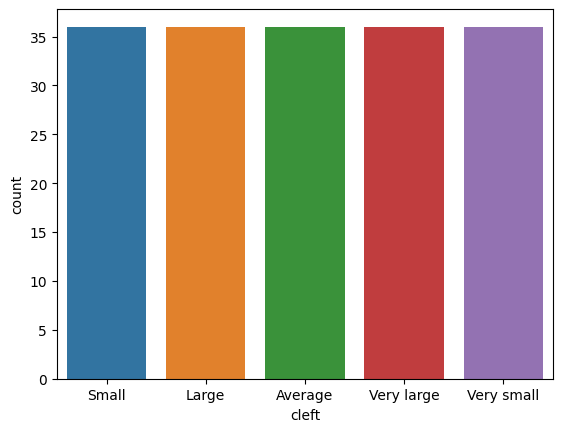

In [81]:
sns.countplot(data=fruits, x="cleft")

Viendo esto podemos apreciar que hay 36 instancias que toman cada valor, siendo estos 5 valores posibles: Small, Large, Average cleft, Very large y Very small. Aquí tenemos varias razones para aplicar a esta variable un ordinal encoder en lugar de un One Hot Encoder. Una de las razones es que los valores que puede tomar la variable cleft si que tienen un orden que podemos definir, como por ejemplo de menor a mayor. Por tanto la codificación ordinal tiene más sentido. Otra de las razones que tenemos para elegirla por encima del OneHotEncoder es que teniendo 5 posibles valores de las variables, el OneHotEncoder nos generaría 4 o 5 columnas binarias más. Por estas y otras razones hemos decidido utilizar la un Ordinal Encoder.

In [82]:
from sklearn.preprocessing import OrdinalEncoder

categories=["Very small","Small","Average","Large","Very large"]
encoder = OrdinalEncoder(categories=[categories])

encoder.fit(fruits[["cleft"]])
cleft_encoder=encoder.transform(fruits[["cleft"]])

cleft_encoder=pd.DataFrame(cleft_encoder, columns=["cleft"])
cleft_encoder

cleft
0      1.0
1      3.0
2      2.0
3      3.0
4      1.0
..     ...
175    0.0
176    1.0
177    2.0
178    0.0
179    2.0

[180 rows x 1 columns]

Viendo el resultado, podemos determinar que hemos conseguido codificar correctamente la columna de cleft a una variable numérica. Ahora la añadiremos a nuestros datos para proceder a su escalamiento.

In [83]:
new_fruits["cleft"]=cleft_encoder

A  continuación pasaremos a visualizar los datos que tenemos, para ver su densidad y entre que valores se encuentran.

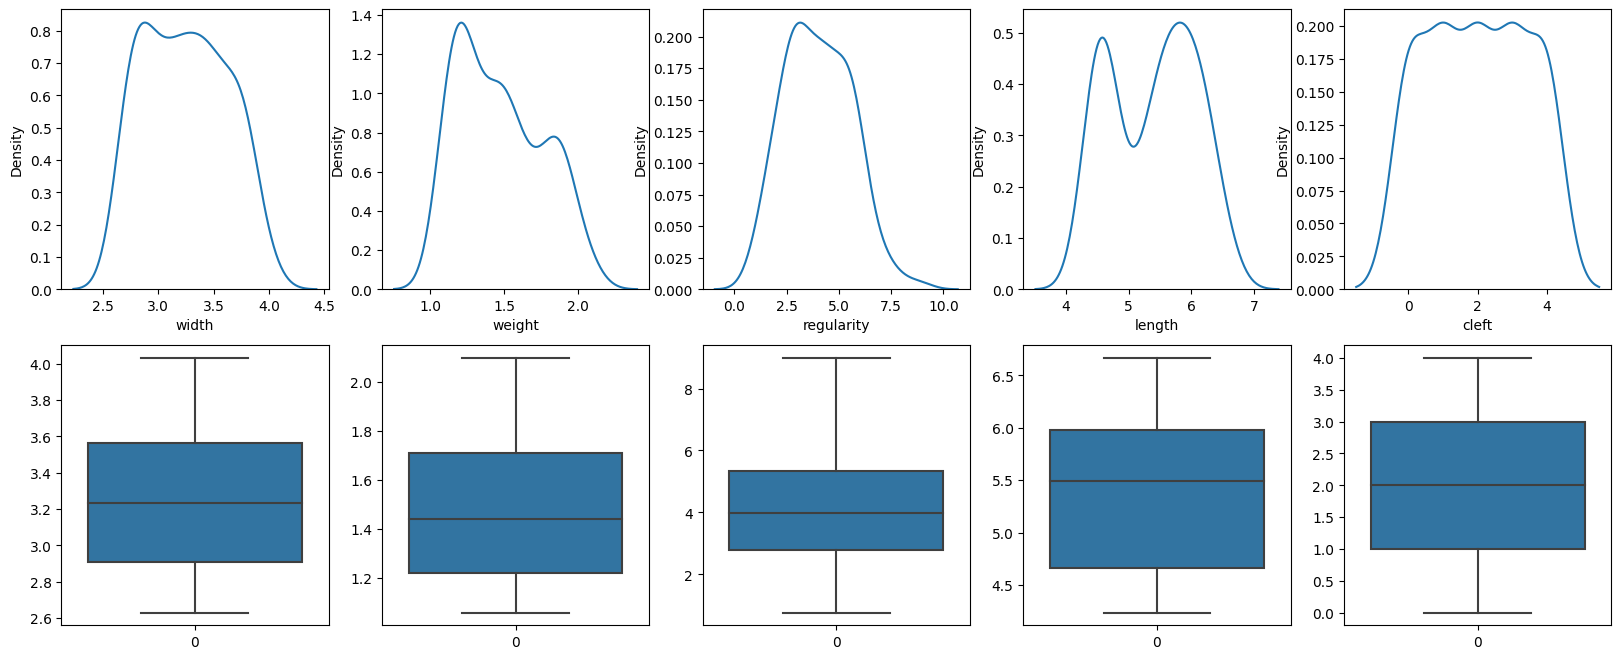

In [84]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 5, 1)
sns.kdeplot(new_fruits["width"])

plt.subplot(2, 5, 2)
sns.kdeplot(new_fruits["weight"])

plt.subplot(2, 5, 3)
sns.kdeplot(new_fruits["regularity"])

plt.subplot(2, 5, 4)
sns.kdeplot(new_fruits["length"])

plt.subplot(2, 5, 5)
sns.kdeplot(new_fruits["cleft"])

plt.subplot(2, 5, 6)
sns.boxplot(new_fruits["width"])

plt.subplot(2, 5, 7)
sns.boxplot(new_fruits["weight"])

plt.subplot(2, 5, 8)
sns.boxplot(new_fruits["regularity"])

plt.subplot(2, 5, 9)
sns.boxplot(new_fruits["length"])

plt.subplot(2, 5, 10)
sns.boxplot(new_fruits["cleft"])

plt.show()

Ahora vemos que hicimos bien en no eliminar el dato atípico de la variable regularity, porque con la imputación de los datos que faltaban este dato ha dejado de ser atípico. En estas gráficas podemos ver de forma aproximada tanto la distribución de las variables como su media y los rangos de valores entre los que se encuentran.

Para acabar con el preprocesado debemos plantearnos primero si es necesario escalarlas. Viendo las gráficas anteriormente mencionadas podemos ver de forma aproximada los rangos, pero queremos verlos de forma más exacta.

In [85]:

rangos= dict(keys=columns)
for column in columns:
    max=float(new_fruits[column].max())
    min=float(new_fruits[column].min())
    dif=max-min
    rangos[column]=(min, max, dif)
rangos

{'keys': Index(['weight', 'length', 'width', 'regularity', 'cleft'], dtype='object'),
 'weight': (1.059, 2.097, 1.038),
 'length': (4.236811412670006, 6.666, 2.4291885873299943),
 'width': (2.63, 4.032, 1.4020000000000001),
 'regularity': (0.7651, 8.986146203041347, 8.221046203041347),
 'cleft': (0.0, 4.0, 4.0)}

Vemos que los rangos que tenemos no son muy parecidos, así que decidimos realizar distintos tipos de escalados. Debemos tener en cuenta que estos métodos de escalado no nos deben de estropear la estructura de los datos. Por ejemplo, la variable cleft debe de seguir teniendo únicamente 5 valores.

Vamos a probar diversos tipos de escalado, como el estándar, el MinMaxScalar o el RobustScalar, para ver qué tipos de resultados nos dan.

In [86]:
def scatterplot_df_fruits(df):

    plt.figure(figsize=(20, 16))

    plt.subplot(5, 4, 1)
    sns.scatterplot(x=df["width"], y=df["weight"])
    plt.subplot(5, 4, 2)
    sns.scatterplot(x=df["width"], y=df["regularity"])
    plt.subplot(5, 4, 3)
    sns.scatterplot(x=df["width"], y=df["length"])
    plt.subplot(5, 4, 4)
    sns.scatterplot(x=df["width"], y=df["cleft"])

    plt.subplot(5, 4, 5)
    sns.scatterplot(x=df["weight"], y=df["width"])
    plt.subplot(5, 4, 6)
    sns.scatterplot(x=df["weight"], y=df["regularity"])
    plt.subplot(5, 4, 7)
    sns.scatterplot(x=df["weight"], y=df["length"])
    plt.subplot(5, 4, 8)
    sns.scatterplot(x=df["weight"], y=df["cleft"])

    plt.subplot(5, 4, 9)
    sns.scatterplot(x=df["regularity"], y=df["weight"])
    plt.subplot(5, 4, 10)
    sns.scatterplot(x=df["regularity"], y=df["width"])
    plt.subplot(5, 4, 11)
    sns.scatterplot(x=df["regularity"], y=df["length"])
    plt.subplot(5, 4, 12)
    sns.scatterplot(x=df["regularity"], y=df["cleft"])

    plt.subplot(5, 4, 13)
    sns.scatterplot(x=df["length"], y=df["weight"])
    plt.subplot(5, 4, 14)
    sns.scatterplot(x=df["length"], y=df["width"])
    plt.subplot(5, 4, 15)
    sns.scatterplot(x=df["length"], y=df["regularity"])
    plt.subplot(5, 4, 16)
    sns.scatterplot(x=df["length"], y=df["cleft"])

    plt.subplot(5, 4, 17)
    sns.scatterplot(x=df["cleft"], y=df["weight"])
    plt.subplot(5, 4, 18)
    sns.scatterplot(x=df["cleft"], y=df["width"])
    plt.subplot(5, 4, 19)
    sns.scatterplot(x=df["cleft"], y=df["regularity"])
    plt.subplot(5, 4, 20)
    sns.scatterplot(x=df["cleft"], y=df["length"])

    plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


standar_scalar_fruits = new_fruits[["weight","length","width", "regularity", "cleft"]]
scaler1 = StandardScaler()
scaler1.fit(standar_scalar_fruits)
standar_scalar_fruits=scaler1.transform(standar_scalar_fruits)
standar_scalar_fruits=pd.DataFrame(standar_scalar_fruits, columns=columns)

minmax_scalar_fruits = new_fruits[["weight","length","width", "regularity", "cleft"]]
scaler2 = MinMaxScaler()
scaler2.fit(minmax_scalar_fruits)
minmax_scalar_fruits=scaler2.transform(minmax_scalar_fruits)
minmax_scalar_fruits=pd.DataFrame(minmax_scalar_fruits, columns=columns)

robust_scalar_fruits = new_fruits[["weight","length","width", "regularity", "cleft"]]
scaler3 = RobustScaler()
scaler3.fit(robust_scalar_fruits)
robust_scalar_fruits=scaler3.transform(robust_scalar_fruits)
robust_scalar_fruits=pd.DataFrame(robust_scalar_fruits, columns=columns)




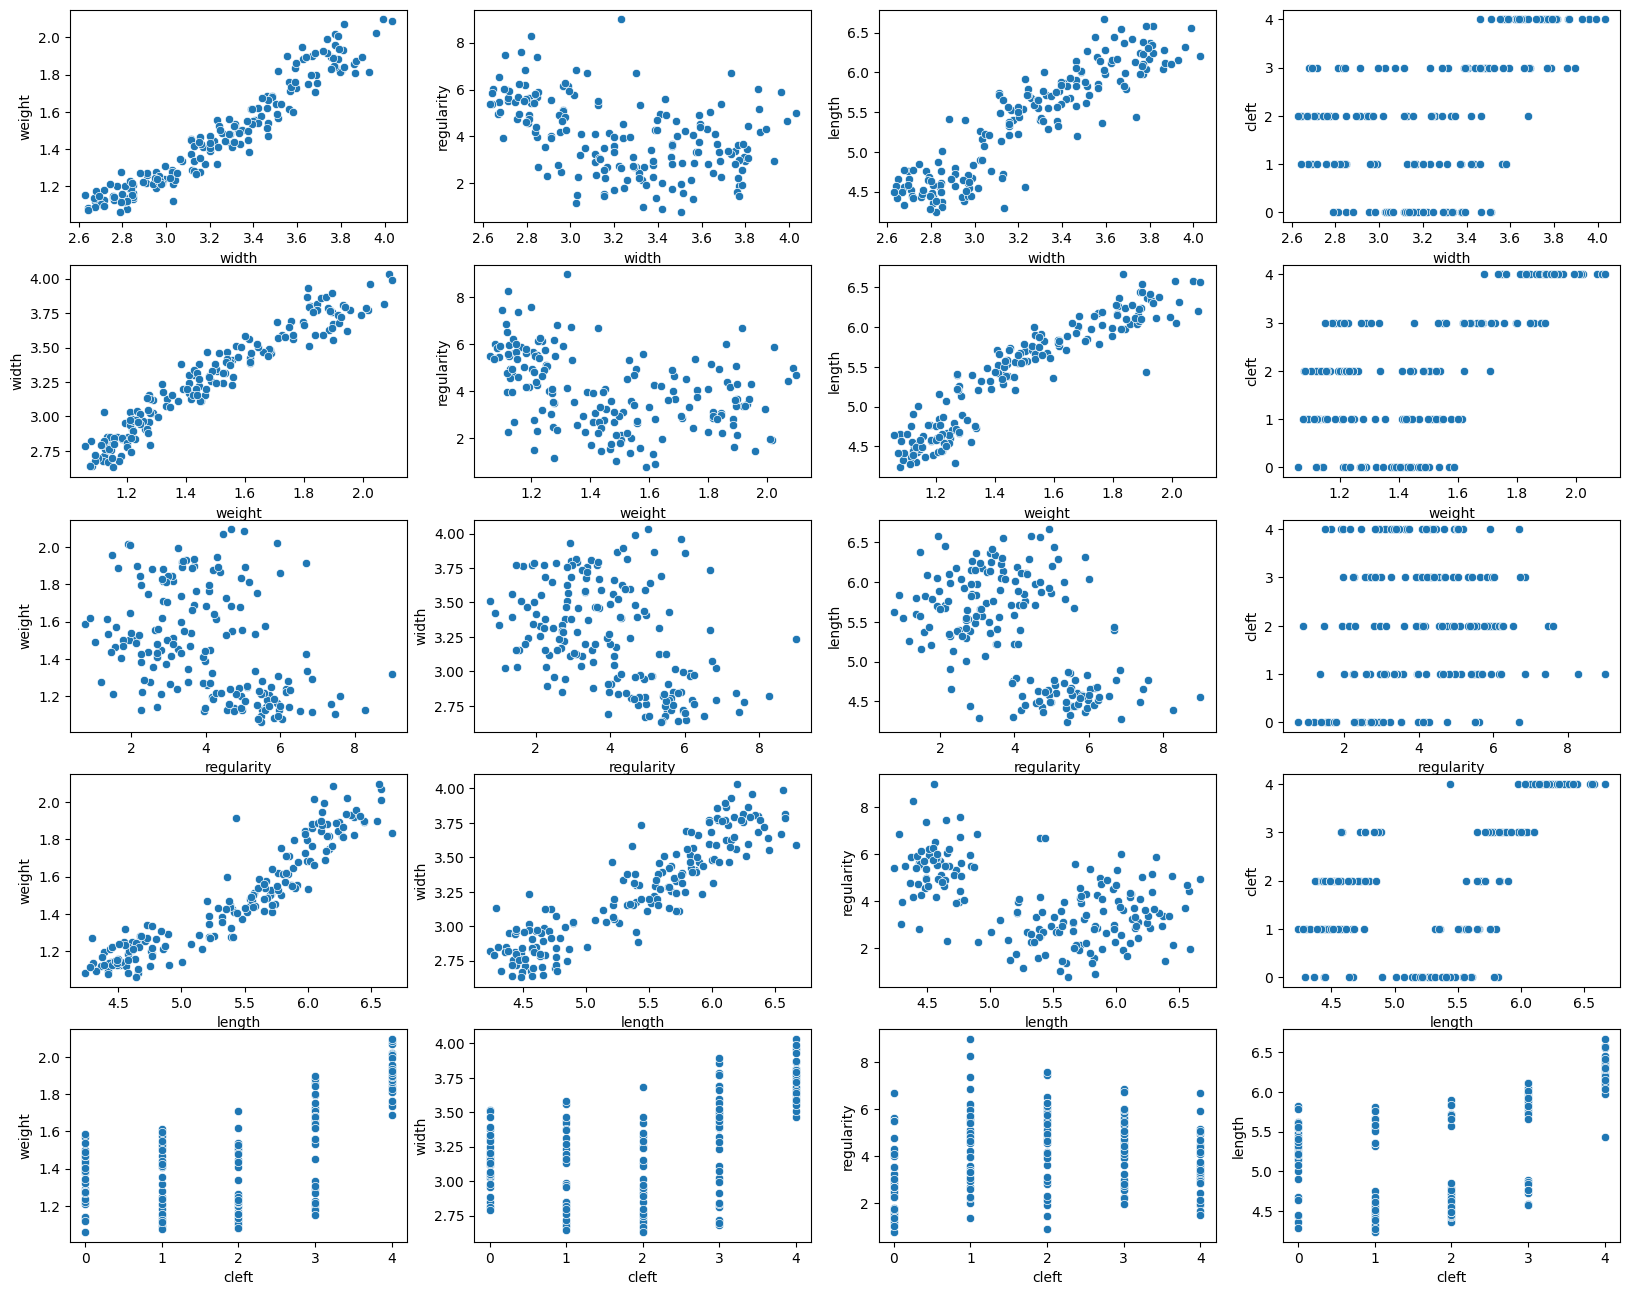

In [88]:
scatterplot_df_fruits(new_fruits)

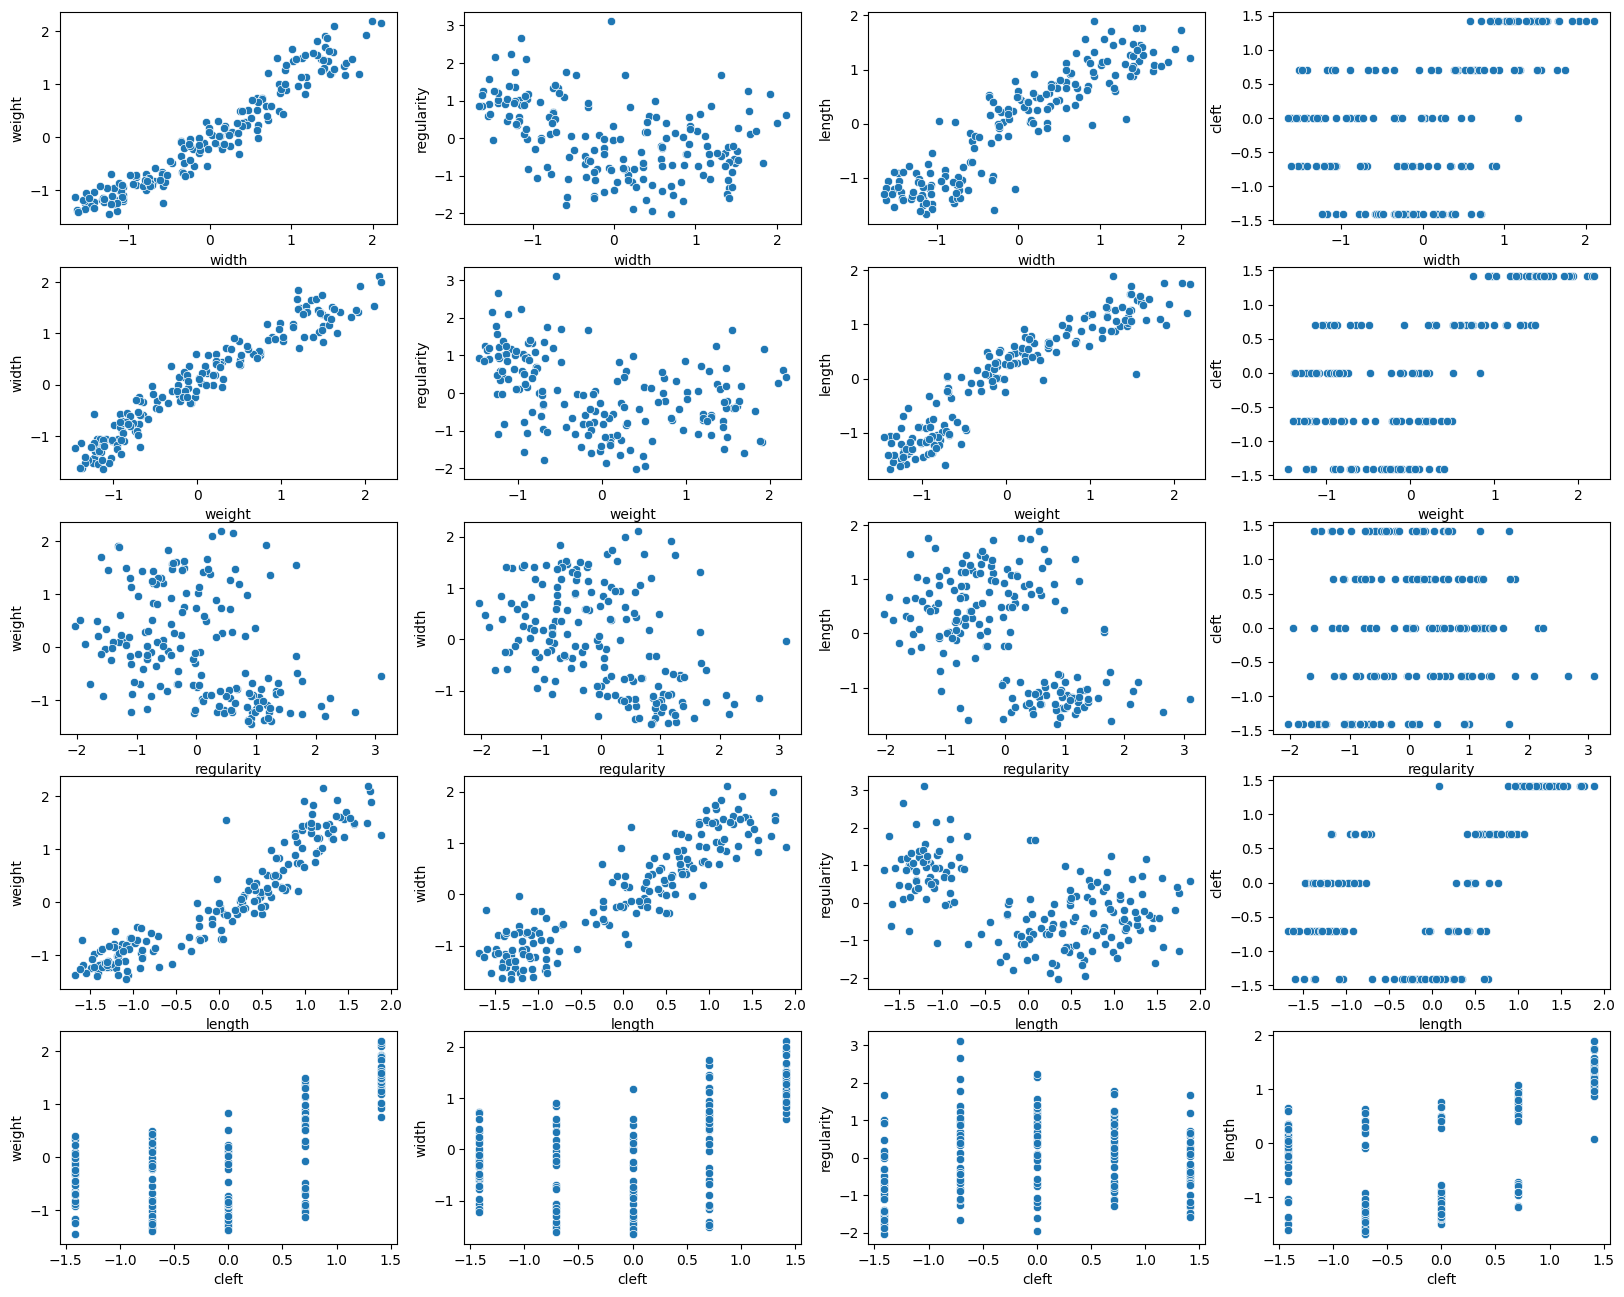

In [89]:
scatterplot_df_fruits(standar_scalar_fruits)

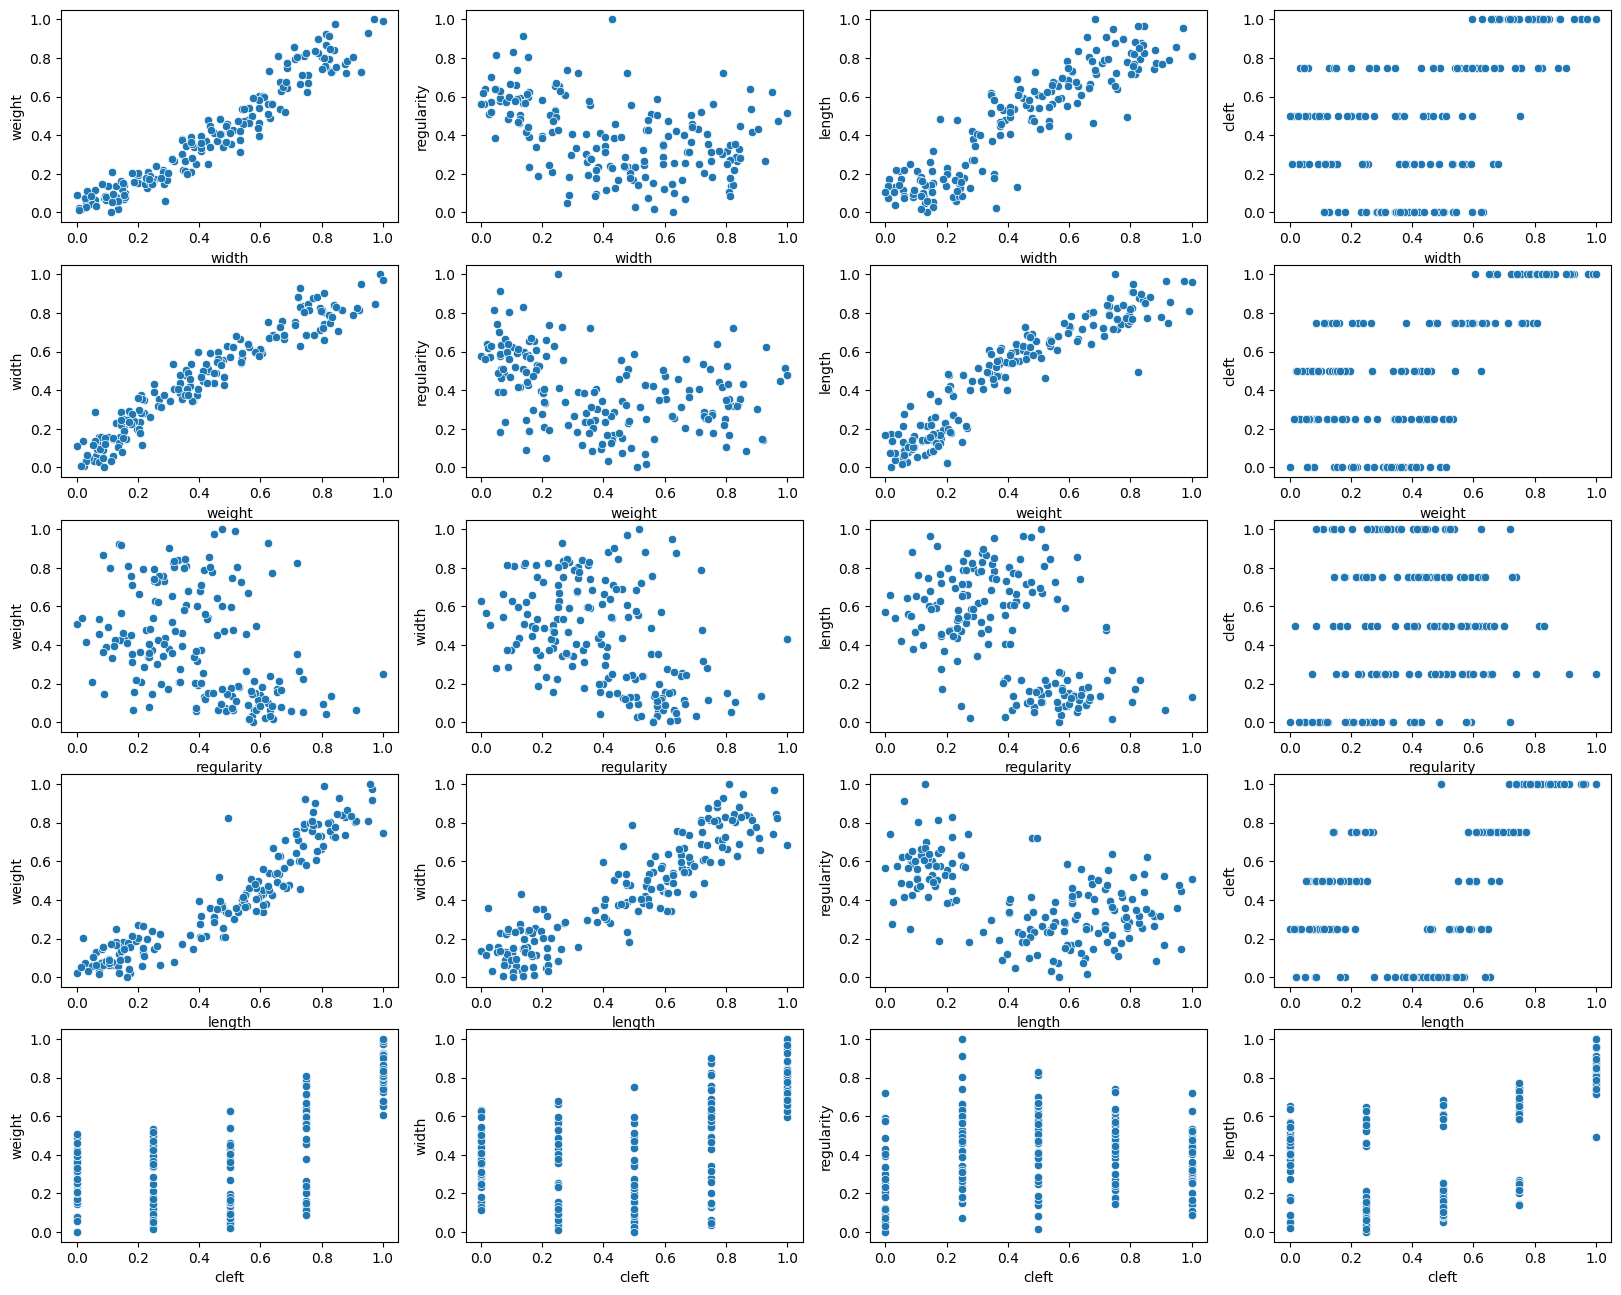

In [90]:
scatterplot_df_fruits(minmax_scalar_fruits)

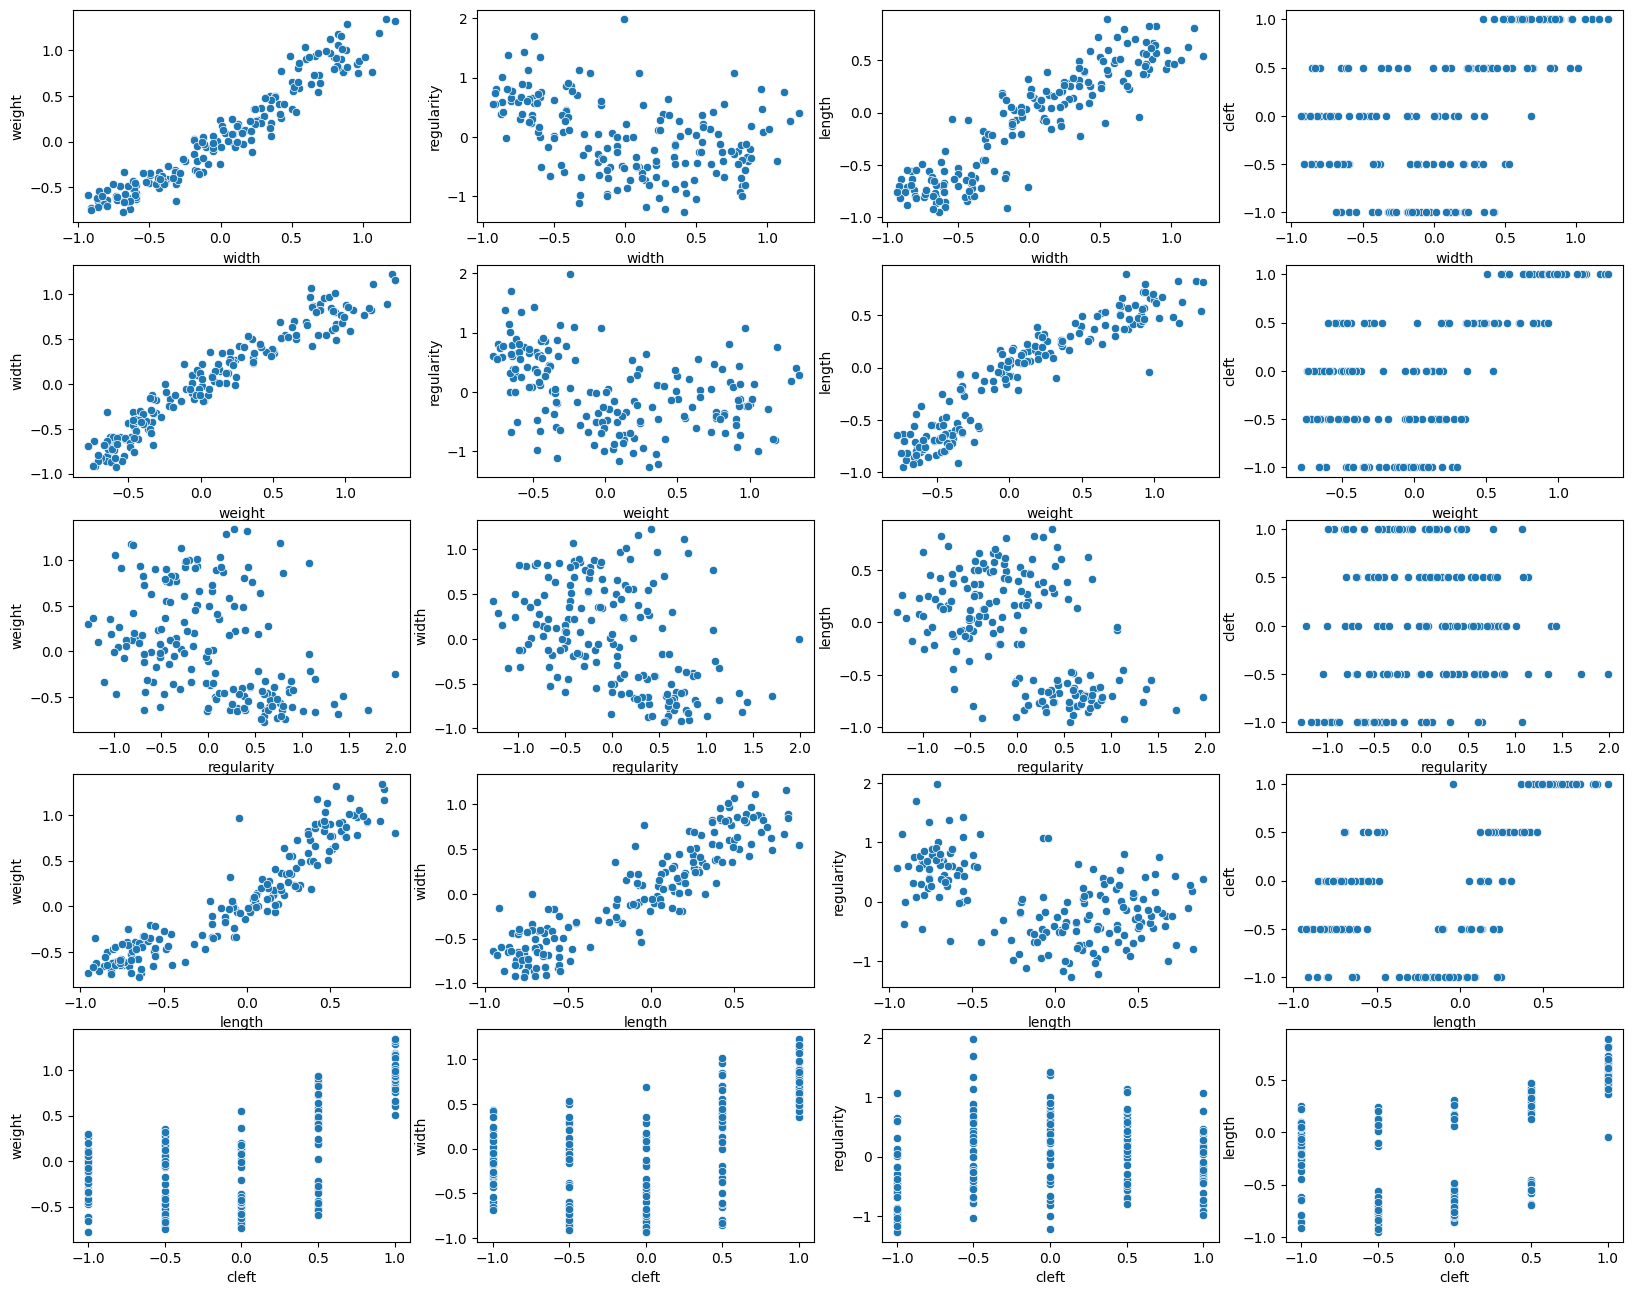

In [91]:
scatterplot_df_fruits(robust_scalar_fruits)

Vamos a guardar todos los modelos en una lista.

In [92]:
scalar_models={"No": new_fruits, "Standar": standar_scalar_fruits, "MinMax": minmax_scalar_fruits, "Robust": robust_scalar_fruits}

Como vemos en los scatterplots, no parece que haya ningún cambio en cuanto a la estructura de los datos, pero lógicamente si que vemos cambios en cuanto a la escala en la que trabajabamos. A primera vista, no sabemos cual de todos los conjuntos de datos nos dará mejores resultados, por lo que probaremos sobre ellos diferentes métodos para poder determinar cual es el óptimo.

Una vez finalizado el preprocesado, aplicaremos las distintas técnicas de clustering que conocemos para ver cuáles dan mejores resultados. Comenzaremos aplicando un clustering jerárquico.

Cuando se aplica un método de clustering jerárquico como el clustering aglomerativo, la principal duda que nos surge es que tipo de linkage utilizamos. Estos tipos pueden ser: Ward, Complete, Average, Simple. También debemos tener en cuenta el número de clusters que queremos o la medida de disimilaridad que queremos utilizar. Nosotros por defecto usaremos la distancia euclídea, pero también probaremos algunas otras como la distancia Manhathan.

A continuación, vamos a definir algunas funciones que nos pueden venir bien más adelante para mostrar los posibles clusters que tenemos.

In [93]:
from sklearn.cluster import AgglomerativeClustering

#El objetivo de esta función es probar distintos números de clusters
def aglomerative_clustering_n(data, linkage, n_range, distance):
    dict_cluster={}
    for n in n_range:
        cluster=AgglomerativeClustering(n_clusters=n, linkage=linkage, metric=distance).fit_predict(data)
        dict_cluster[n]=cluster
    return dict_cluster


#El objetivo de esta función es mostrar dado un dataframe, la distribución de los valores que toman los distintos clusters

def mostrar_clusters(df: pd.DataFrame, n_paleta):

    paleta = sns.color_palette("Set1", n_colors=n_paleta)

    plt.figure(figsize=(20, 16))

    plt.subplot(5, 4, 1)
    sns.scatterplot(x=df["width"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 2)
    sns.scatterplot(x=df["width"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 3)
    sns.scatterplot(x=df["width"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 4)
    sns.scatterplot(x=df["width"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 5)
    sns.scatterplot(x=df["weight"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 6)
    sns.scatterplot(x=df["weight"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 7)
    sns.scatterplot(x=df["weight"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 8)
    sns.scatterplot(x=df["weight"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 9)
    sns.scatterplot(x=df["regularity"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 10)
    sns.scatterplot(x=df["regularity"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 11)
    sns.scatterplot(x=df["regularity"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 12)
    sns.scatterplot(x=df["regularity"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 13)
    sns.scatterplot(x=df["length"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 14)
    sns.scatterplot(x=df["length"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 15)
    sns.scatterplot(x=df["length"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 16)
    sns.scatterplot(x=df["length"], y=df["cleft"], hue=df["cluster"], palette=paleta, legend=False)

    plt.subplot(5, 4, 17)
    sns.scatterplot(x=df["cleft"], y=df["weight"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 18)
    sns.scatterplot(x=df["cleft"], y=df["width"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 19)
    sns.scatterplot(x=df["cleft"], y=df["regularity"], hue=df["cluster"], palette=paleta, legend=False)
    plt.subplot(5, 4, 20)
    sns.scatterplot(x=df["cleft"], y=df["length"], hue=df["cluster"], palette=paleta, legend=False)

    plt.show()

Para poder sacar mejores conclusiones y aproximarnos mejor a la solución, vamos a comenzar primero por un análisis de los dendrogramas que generemos. Estos dendrogramas van a estar caracterizados por el tipo de linkage, el escalado de los datos y la distancia usada.

-------------------------------------MODEL CHANGED TO  No -----------------------------------------------------
----------------------------------------METRIC = euclidean-------------------------------------------------------
----------------------------------------LINKAGE = ward-------------------------------------------------------


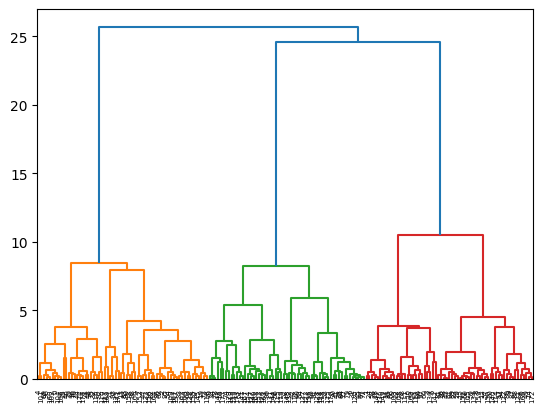

----------------------------------------METRIC =  euclidean -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


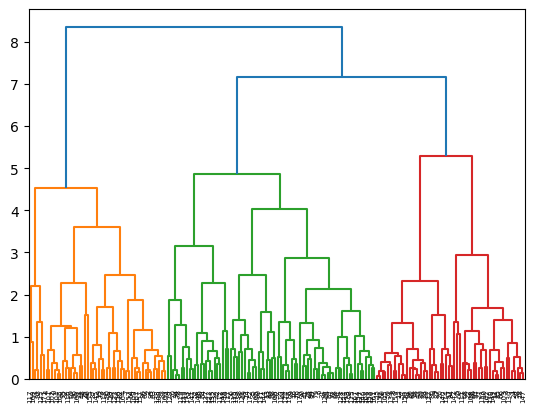

----------------------------------------LINKAGE =  average -------------------------------------------------------


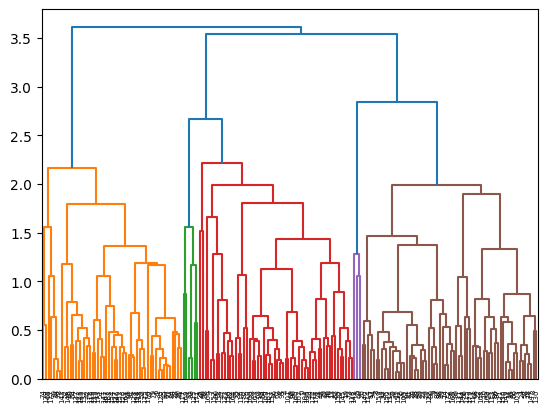

----------------------------------------LINKAGE =  single -------------------------------------------------------


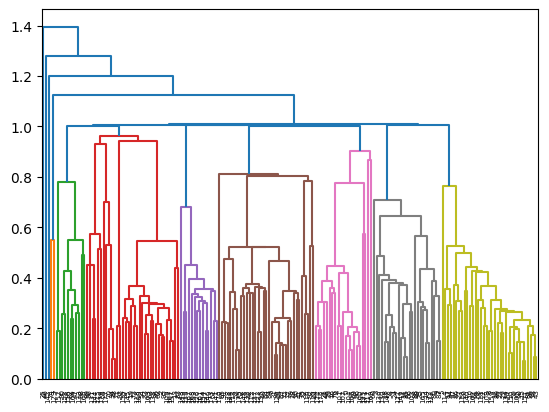

----------------------------------------METRIC =  cityblock -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


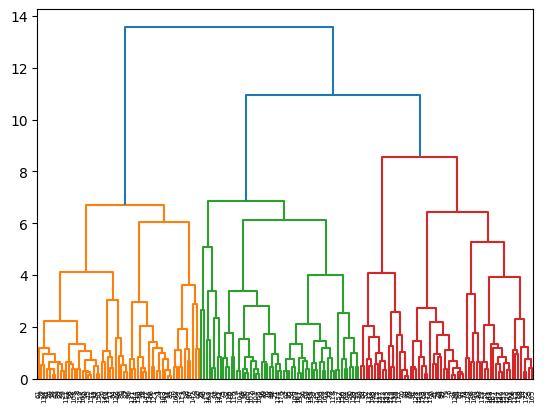

----------------------------------------LINKAGE =  average -------------------------------------------------------


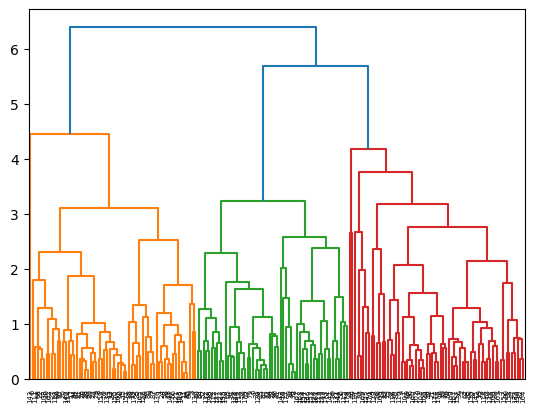

----------------------------------------LINKAGE =  single -------------------------------------------------------


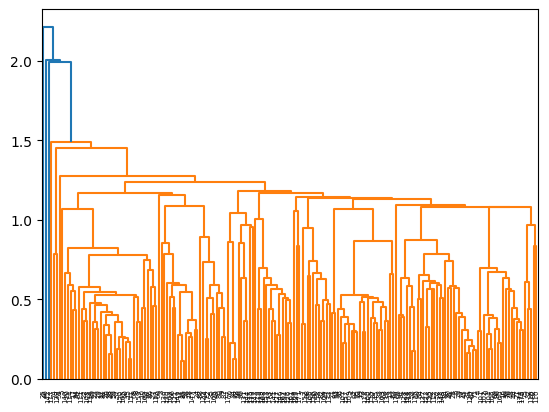

----------------------------------------METRIC =  chebyshev -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


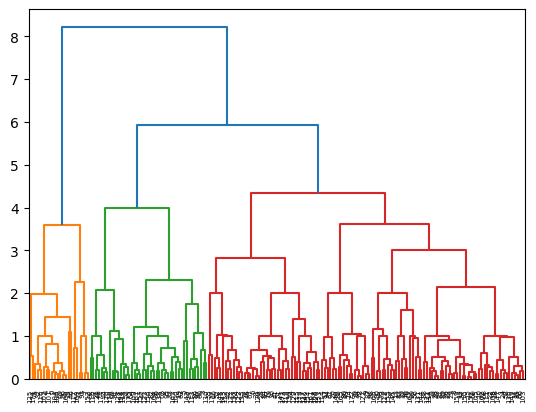

----------------------------------------LINKAGE =  average -------------------------------------------------------


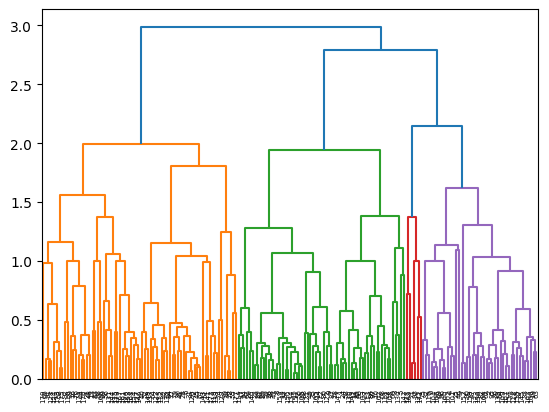

----------------------------------------LINKAGE =  single -------------------------------------------------------


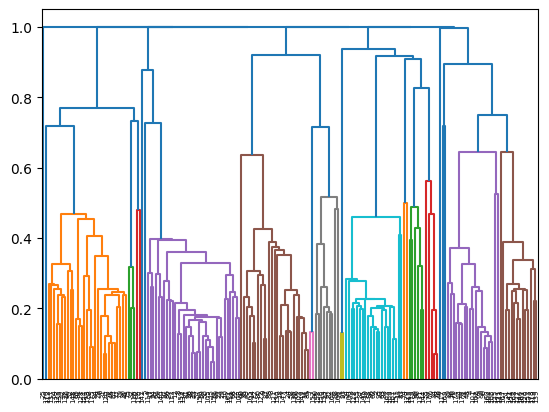

----------------------------------------METRIC =  correlation -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


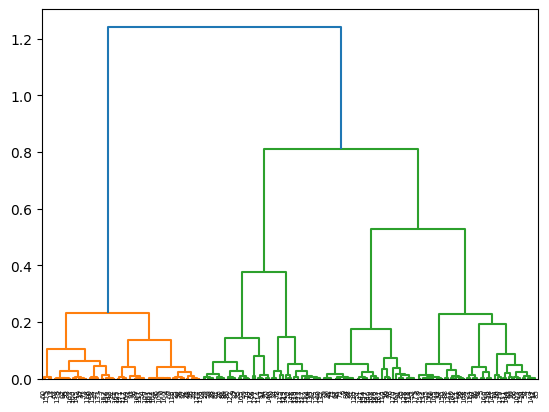

----------------------------------------LINKAGE =  average -------------------------------------------------------


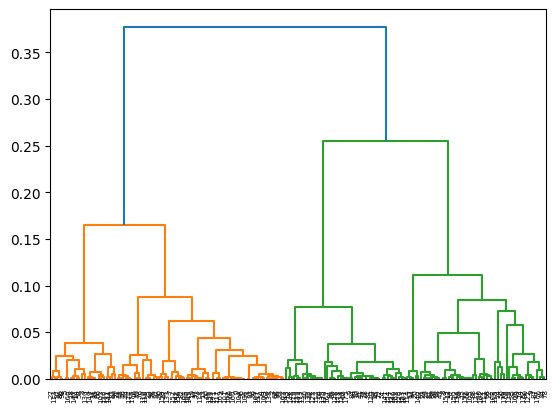

----------------------------------------LINKAGE =  single -------------------------------------------------------


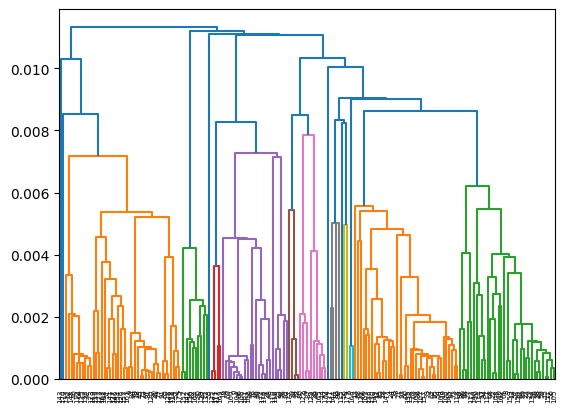

-------------------------------------MODEL CHANGED TO  Standar -----------------------------------------------------
----------------------------------------METRIC = euclidean-------------------------------------------------------
----------------------------------------LINKAGE = ward-------------------------------------------------------


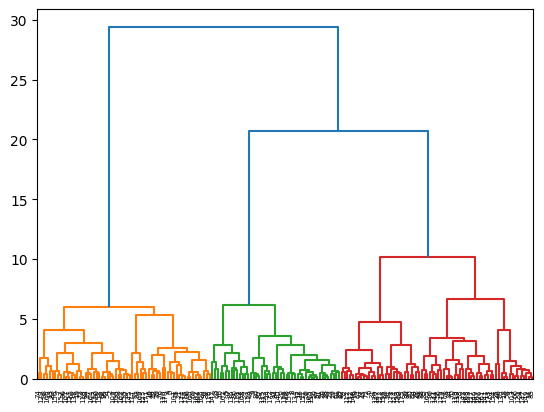

----------------------------------------METRIC =  euclidean -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


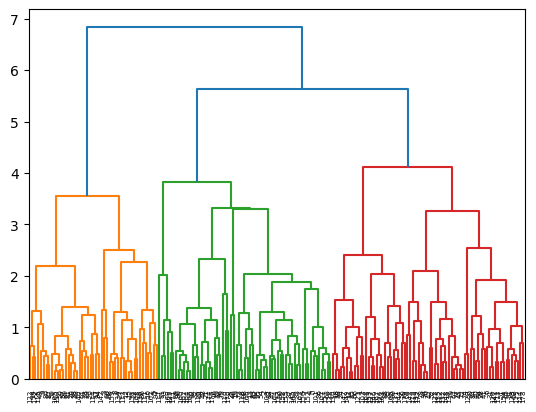

----------------------------------------LINKAGE =  average -------------------------------------------------------


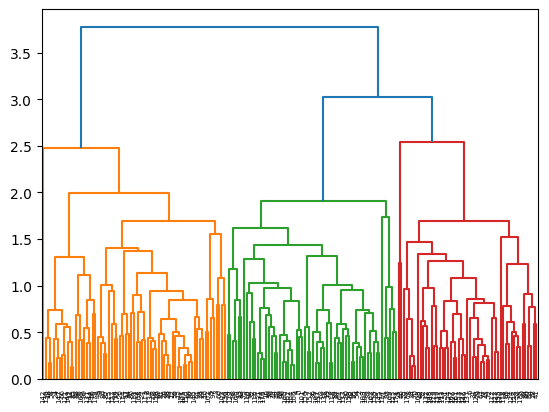

----------------------------------------LINKAGE =  single -------------------------------------------------------


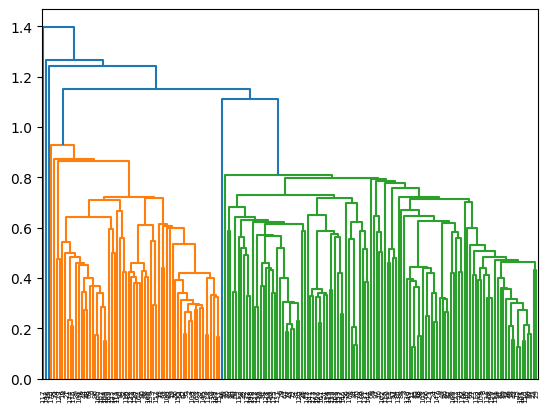

----------------------------------------METRIC =  cityblock -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


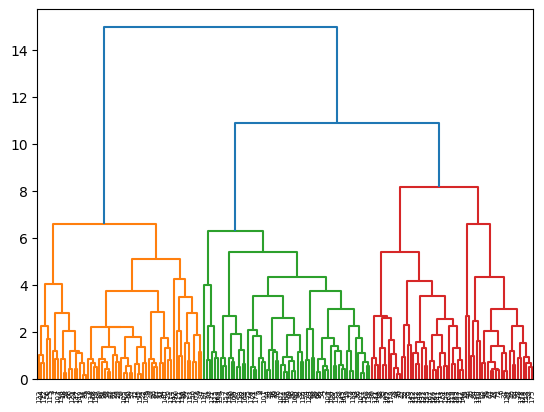

----------------------------------------LINKAGE =  average -------------------------------------------------------


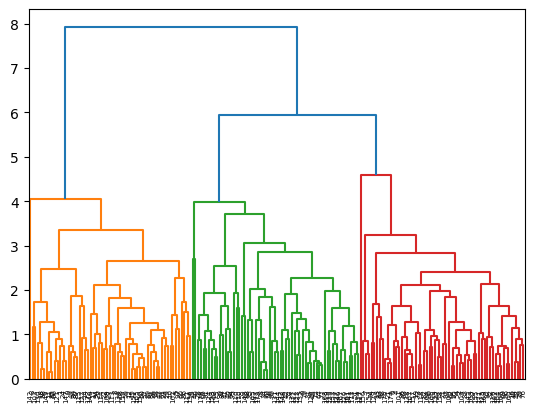

----------------------------------------LINKAGE =  single -------------------------------------------------------


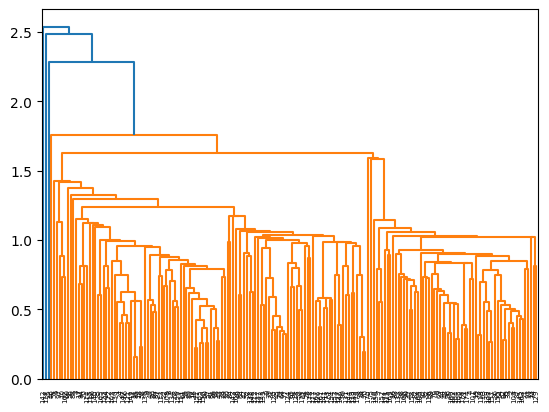

----------------------------------------METRIC =  chebyshev -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


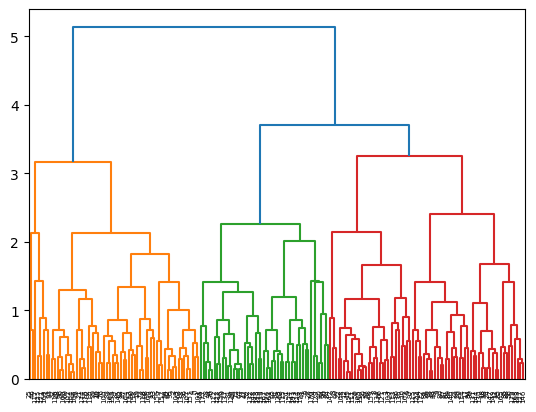

----------------------------------------LINKAGE =  average -------------------------------------------------------


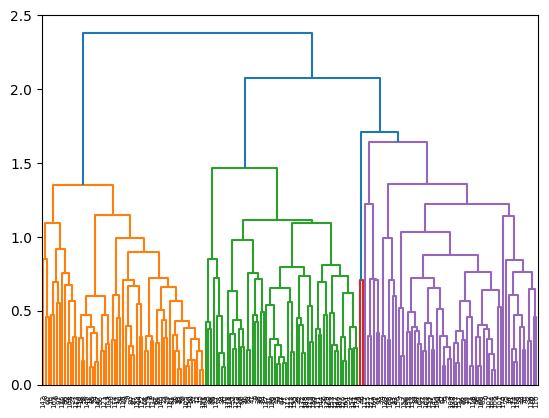

----------------------------------------LINKAGE =  single -------------------------------------------------------


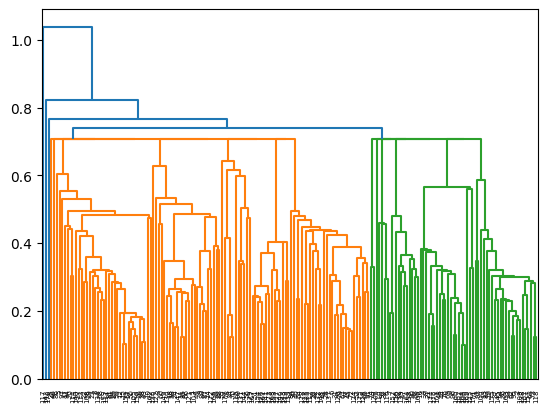

----------------------------------------METRIC =  correlation -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


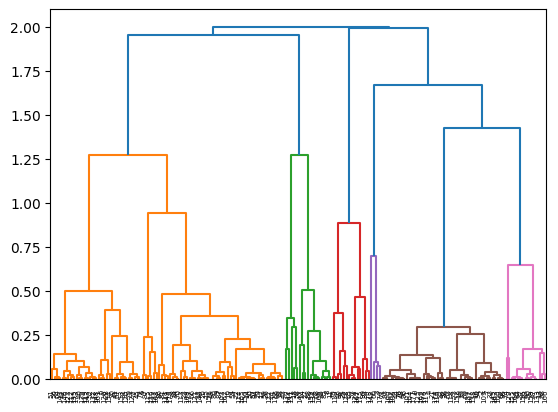

----------------------------------------LINKAGE =  average -------------------------------------------------------


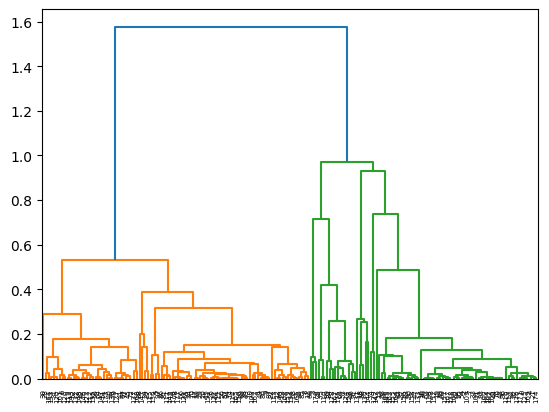

----------------------------------------LINKAGE =  single -------------------------------------------------------


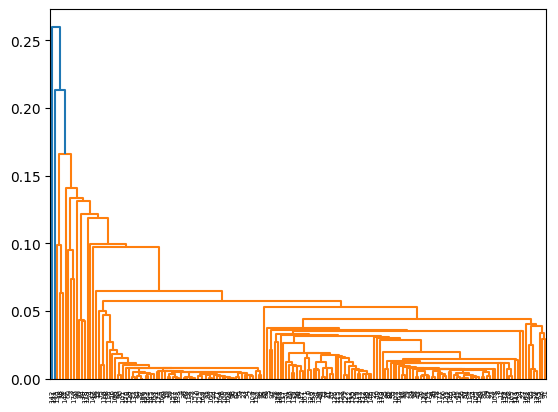

-------------------------------------MODEL CHANGED TO  MinMax -----------------------------------------------------
----------------------------------------METRIC = euclidean-------------------------------------------------------
----------------------------------------LINKAGE = ward-------------------------------------------------------


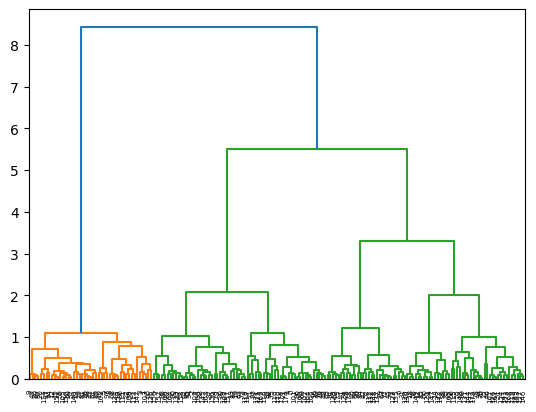

----------------------------------------METRIC =  euclidean -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


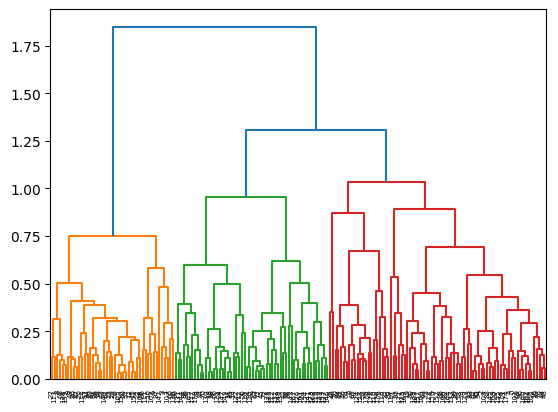

----------------------------------------LINKAGE =  average -------------------------------------------------------


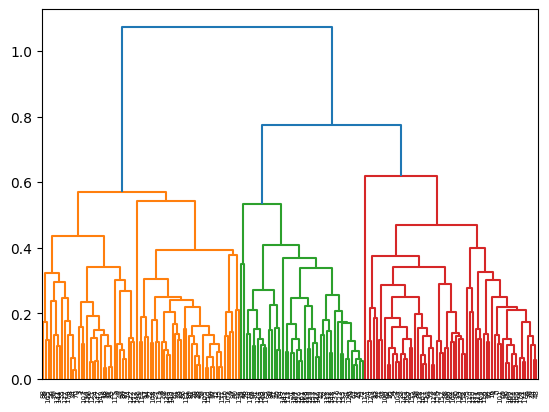

----------------------------------------LINKAGE =  single -------------------------------------------------------


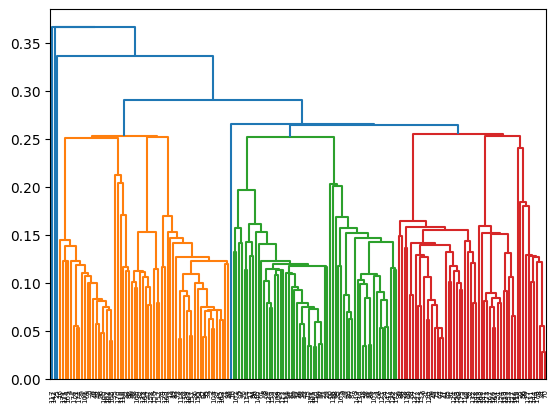

----------------------------------------METRIC =  cityblock -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


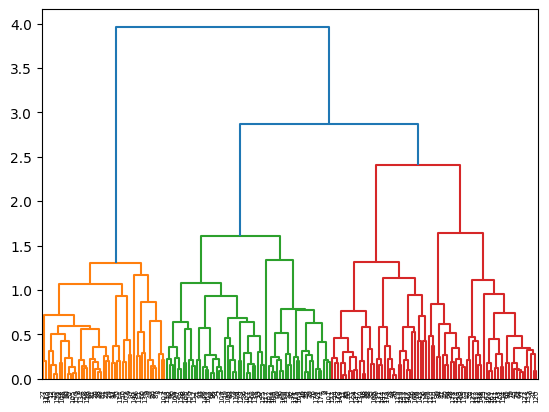

----------------------------------------LINKAGE =  average -------------------------------------------------------


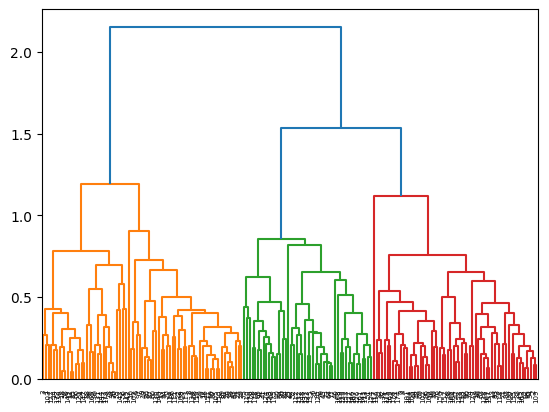

----------------------------------------LINKAGE =  single -------------------------------------------------------


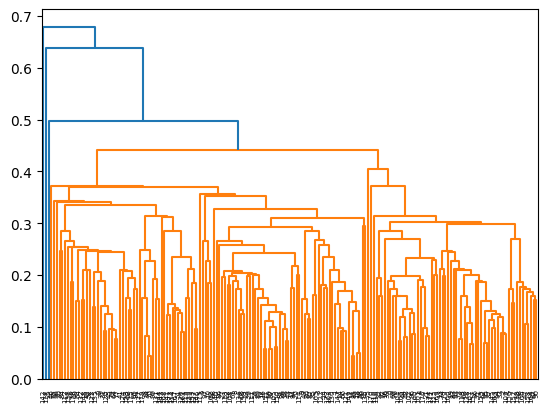

----------------------------------------METRIC =  chebyshev -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


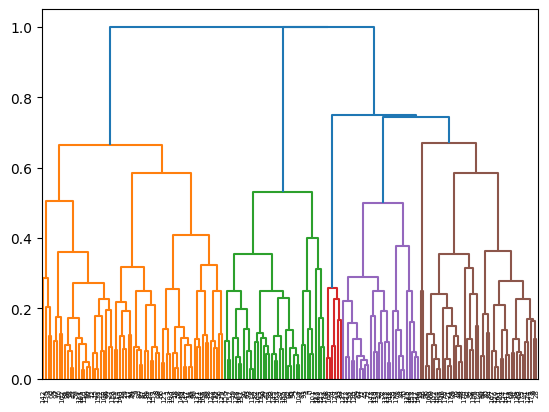

----------------------------------------LINKAGE =  average -------------------------------------------------------


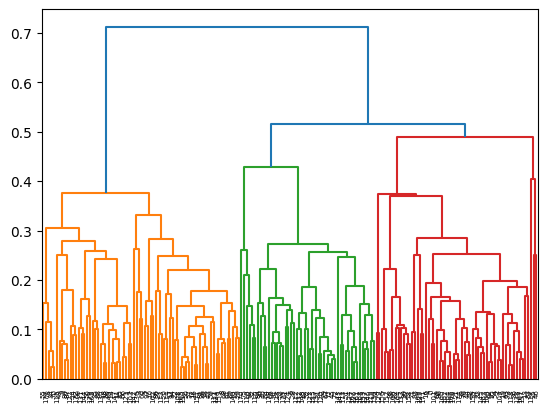

----------------------------------------LINKAGE =  single -------------------------------------------------------


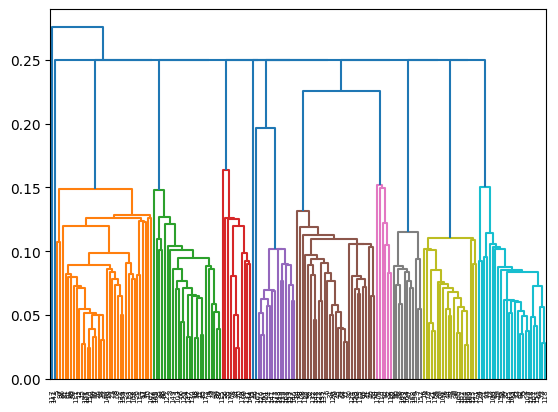

----------------------------------------METRIC =  correlation -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


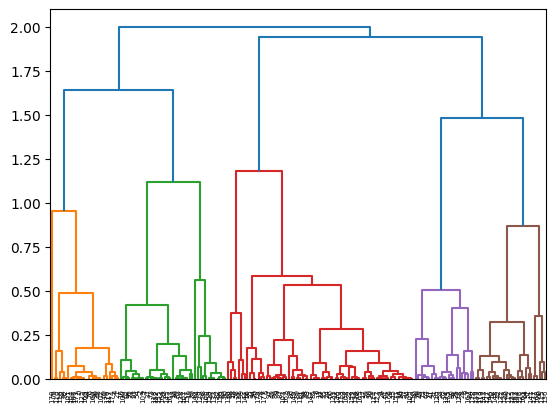

----------------------------------------LINKAGE =  average -------------------------------------------------------


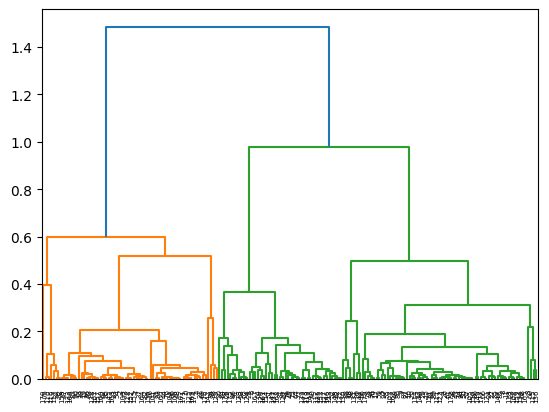

----------------------------------------LINKAGE =  single -------------------------------------------------------


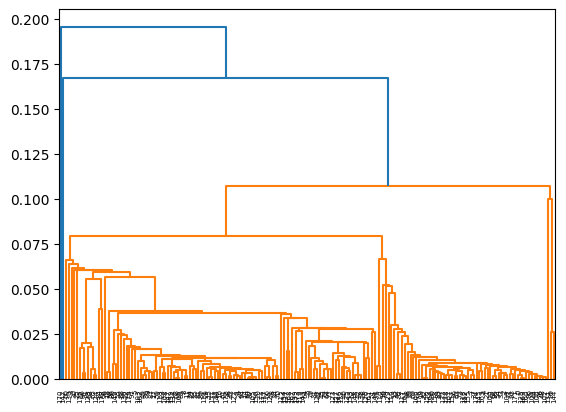

-------------------------------------MODEL CHANGED TO  Robust -----------------------------------------------------
----------------------------------------METRIC = euclidean-------------------------------------------------------
----------------------------------------LINKAGE = ward-------------------------------------------------------


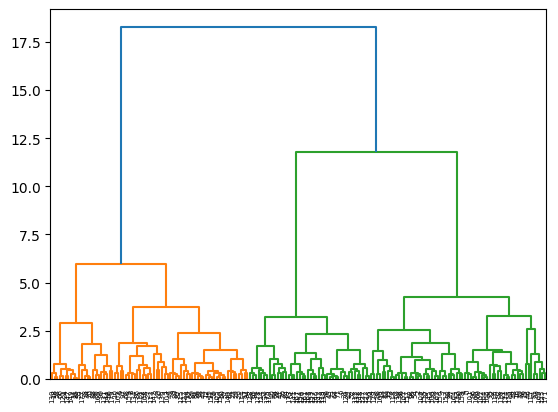

----------------------------------------METRIC =  euclidean -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


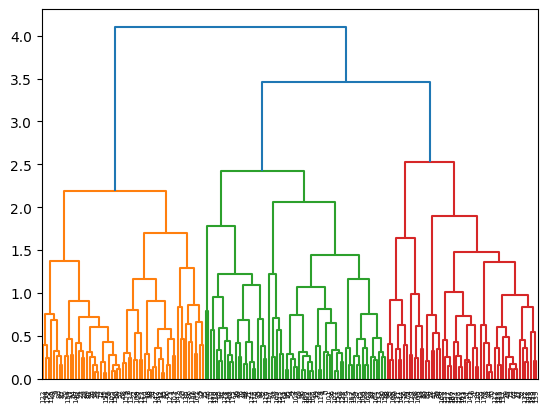

----------------------------------------LINKAGE =  average -------------------------------------------------------


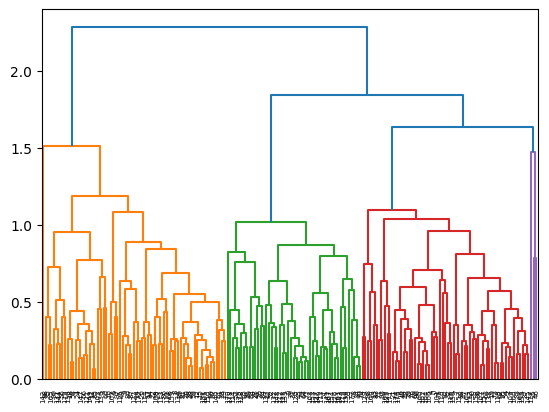

----------------------------------------LINKAGE =  single -------------------------------------------------------


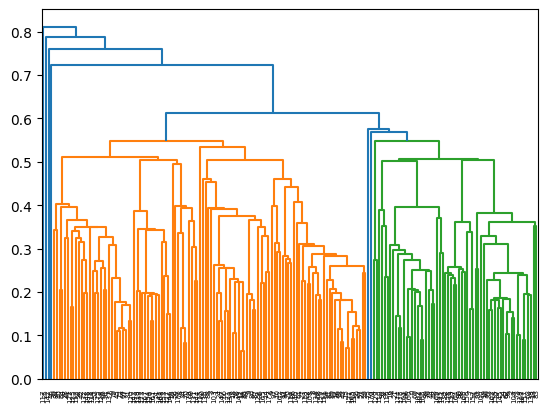

----------------------------------------METRIC =  cityblock -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


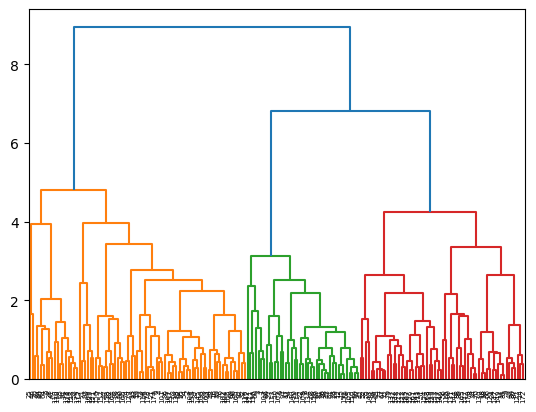

----------------------------------------LINKAGE =  average -------------------------------------------------------


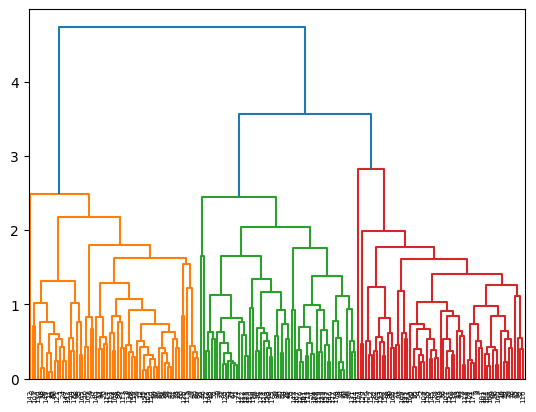

----------------------------------------LINKAGE =  single -------------------------------------------------------


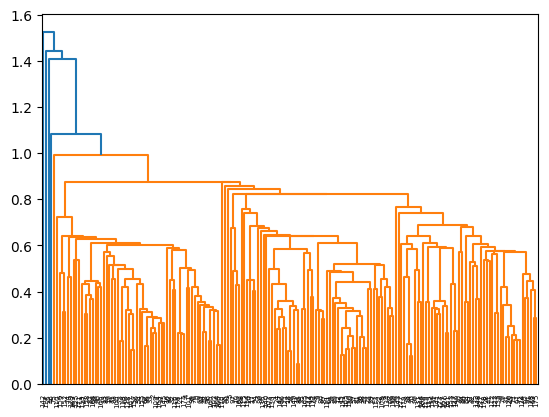

----------------------------------------METRIC =  chebyshev -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


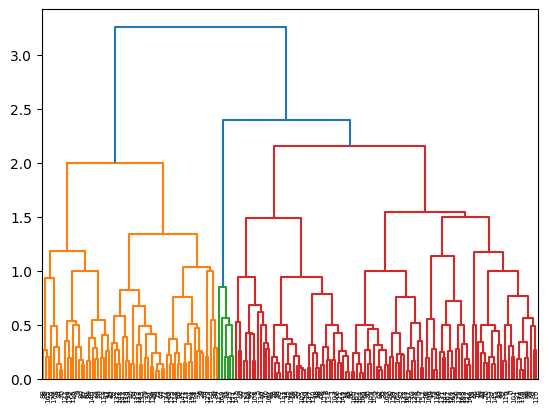

----------------------------------------LINKAGE =  average -------------------------------------------------------


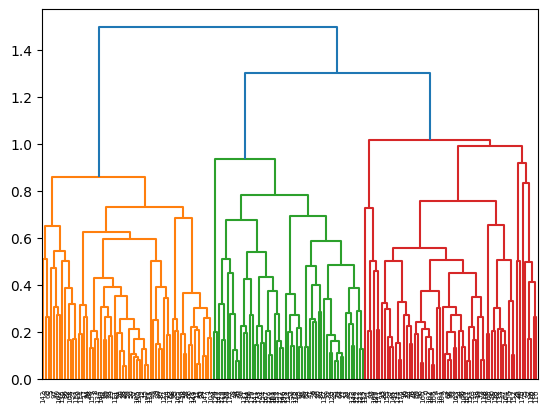

----------------------------------------LINKAGE =  single -------------------------------------------------------


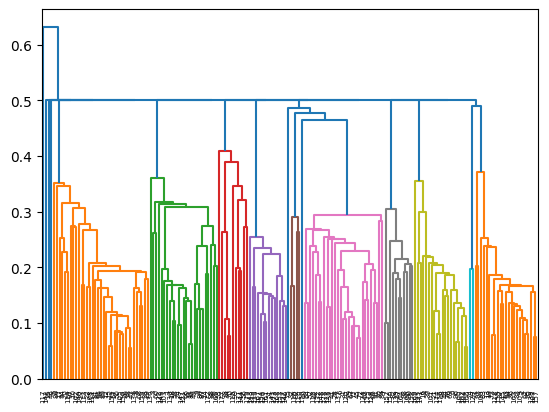

----------------------------------------METRIC =  correlation -------------------------------------------------------
----------------------------------------LINKAGE =  complete -------------------------------------------------------


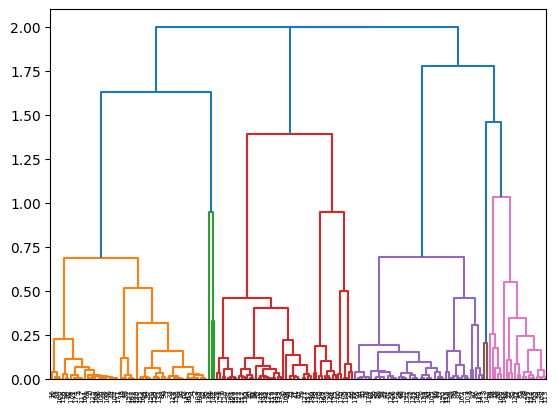

----------------------------------------LINKAGE =  average -------------------------------------------------------


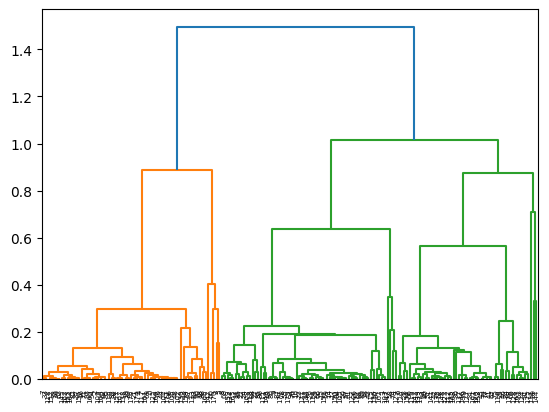

----------------------------------------LINKAGE =  single -------------------------------------------------------


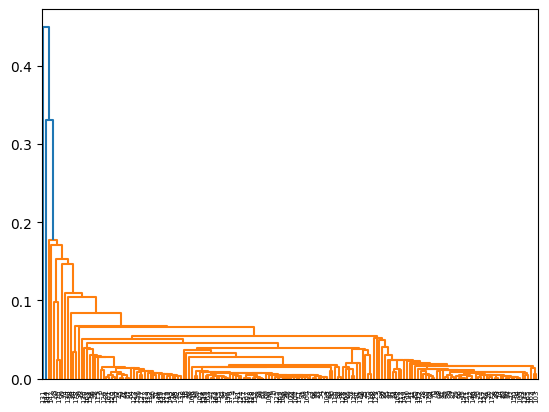

In [94]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkages=["complete", "average", "single"]
#linkages=["complete"]
distances=["euclidean", "cityblock", "chebyshev", "correlation"]
#distances=["euclidean"]

for key in scalar_models.keys():
    print("-------------------------------------MODEL CHANGED TO ", key, "-----------------------------------------------------")
    print("----------------------------------------METRIC = euclidean-------------------------------------------------------")
    print("----------------------------------------LINKAGE = ward-------------------------------------------------------")

    linkage_matrix=linkage(scalar_models[key], method="ward", metric="euclidean")
    dendrogram(linkage_matrix)

    plt.show()

    for distance in distances:
        print("----------------------------------------METRIC = ", distance, "-------------------------------------------------------")
        for linkage1 in linkages:
            print("----------------------------------------LINKAGE = ", linkage1, "-------------------------------------------------------")

            linkage_matrix=linkage(scalar_models[key], method=linkage1, metric=distance)
            dendrogram(linkage_matrix)

            plt.show()

Bien, aquí hemos generado muchos dendrogramas de los cuales vamos a intentar sacar unas conclusiones. En primer lugar queremos ver cuál es el número de clusters que normalmente conseguimos, a pesar de los cambios de los datos, las distancias y los linkages.

En la mayoría de dendrogramas vemos que generamos 3 clusters. Otros valores para el número de clusters también bastante repetidos son el 2 y el 4. Por lo tanto, podemos suponer que el número de clusters que tenemos va a rondar esos valores.

Otra conclusión que podemos extraer de los dendrogramas es que el tipo de linkage single es el más propenso a tender a valores extremos, ya que en la mayoría de los dendrogramas generados utilizando este linkage observamos o un único cluster, dos clusters con uno de ellos bastante descompensado, o un gran número de clusters generados. Esto tiene sentido con lo que hemos estudiado, ya que vimos que el simgle linkage es muy extremo a la hora de balancear los clusters. En el caso del average linkage, sabemos que este es sensible a las escalas. Esto es algo que podemos comprobar gracias a las gráficas, ya que cuando hacemos clustering con los datos sin escalar usando este linkage y la distancia eucídea nos damos cuenta de que genera resultados muy diferentes a los que tenemos en encontramos cuando usamos la misma configuración pero con datos ya escalados.
El complete y el ward parecen sin duda los tipos de linkage más fiables para nuestro caso, aunque tenemos la desventaja de que el ward solo se podrá usar con la métrica de la distancia euclídea.

Si hablamos de las métricas, parece que cuando usamos la correlación o la distancia de chevyshev como métricas, obtenemos resultados no muy buenos, ya que son muy variados y no nos dejan mucho margen para poder sacar conclusiones buenas. Por otro lado, cuando usamos la distancia euclídea o la distancia Manhattan solemos obtener resultados más parecidos y coherentes entre sí.

Resumiendo, hemos decidido que no usaremos ni el simple linkage ni el average linkage, debido a que el ward y el complete linkage dan mejores resultados. Por último, vamos a usar la distacia euclídea y la distancia Manhatann, y descartaremos la distacia chevyshev y la correlación como métricas.

Una vez discutido esto, es hora de ver con que escalado de los datos nos quedamos. Ya hemos visto que los datos sin escalar no funcionan bien, por lo que son los primeros en ser descartados. Si nos fijamos en los dendrogramas graficados usando las métricas y los linkages con los que nos hemos quedado finalmente, podemos ver que los que más similaridades presentan, y que por lo tanto tiene más posibilidades de acercarse a una solución correcta son aquellos en los que los datos han sido estandarizados. Por lo tanto, estos son los que formarán nuestro conjunto de datos a partir de ahora.

Podemos concluir diciendo que el criterio que hemos seguido a la hora de descartar las posibles combinaciones de escalado, métrica y linkage es que nos hemos quedado con aquellas combinaciones cuyo dendrograma tenga más características en común con el resto.

Con estos diagramas no podemos decidir aún cuantos clusters son los que debemos usar, por lo que vamos a usar el coeficiente de silhouette para determinar cual es el número de clusters, así como que métrica y que linkage da mejores resultados para ese número de clusters.

In [95]:
from sklearn.metrics import silhouette_score

def silhouette(data, dict_cluster, metric):

    silhouette=[]
    n_range = range(2,8)

    for n in n_range:

        silhouette.append(silhouette_score(data, labels=dict_cluster[n], metric=metric))

    plt.plot(n_range, silhouette, marker = "o", linestyle="-")

In [96]:
final_fruits_dict = {"Standar Scaler":standar_scalar_fruits, "Robust Scaler":robust_scalar_fruits, "MinMax Scaler":minmax_scalar_fruits}
distances = ["euclidean", "cityblock"]
linkages = ["ward", "complete"]
n_range = range(2,8)

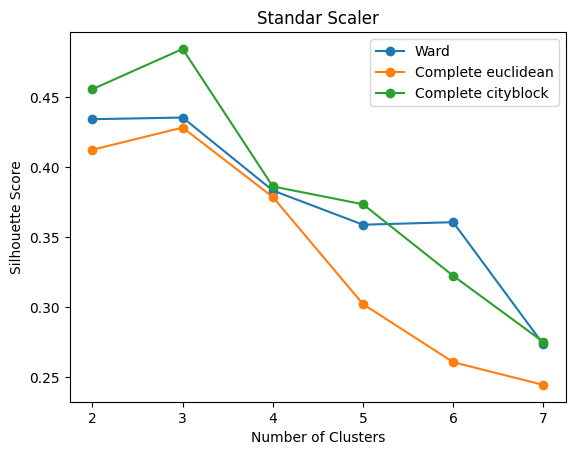

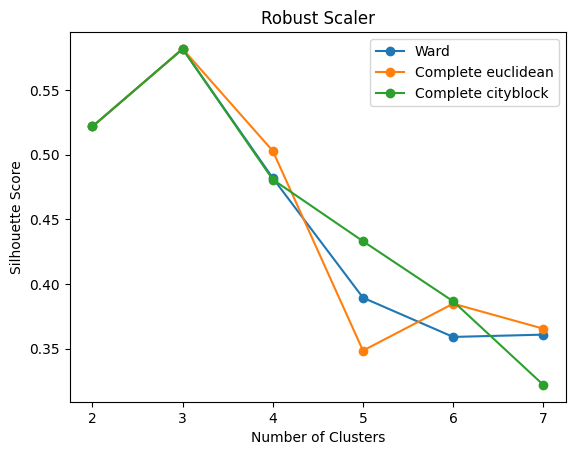

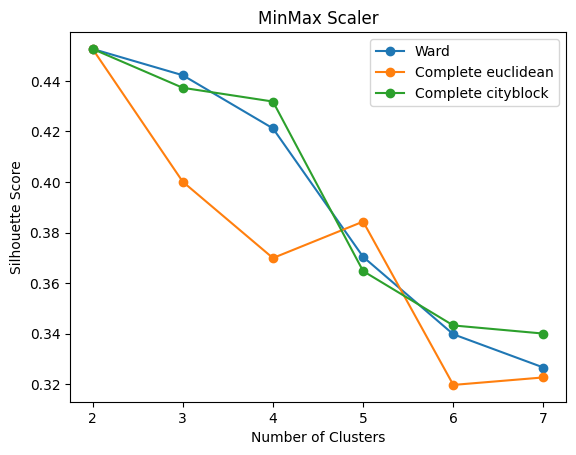

In [102]:
for key in final_fruits_dict.keys():
    dict_ward = aglomerative_clustering_n(final_fruits_dict[key], linkage="ward", distance="euclidean", n_range=n_range)
    dict_complete_euclidean = aglomerative_clustering_n(final_fruits_dict[key], linkage="complete", distance="euclidean", n_range=n_range)
    dict_complete_cityblock = aglomerative_clustering_n(final_fruits_dict[key], linkage="complete", distance="cityblock", n_range=n_range)

    silhouette(final_fruits_dict[key], dict_ward, "euclidean")
    silhouette(final_fruits_dict[key], dict_complete_euclidean, "euclidean")
    silhouette(final_fruits_dict[key], dict_complete_cityblock, "euclidean")

    plt.legend(["Ward", "Complete euclidean", "Complete cityblock"])
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title(str(key))
    plt.show()

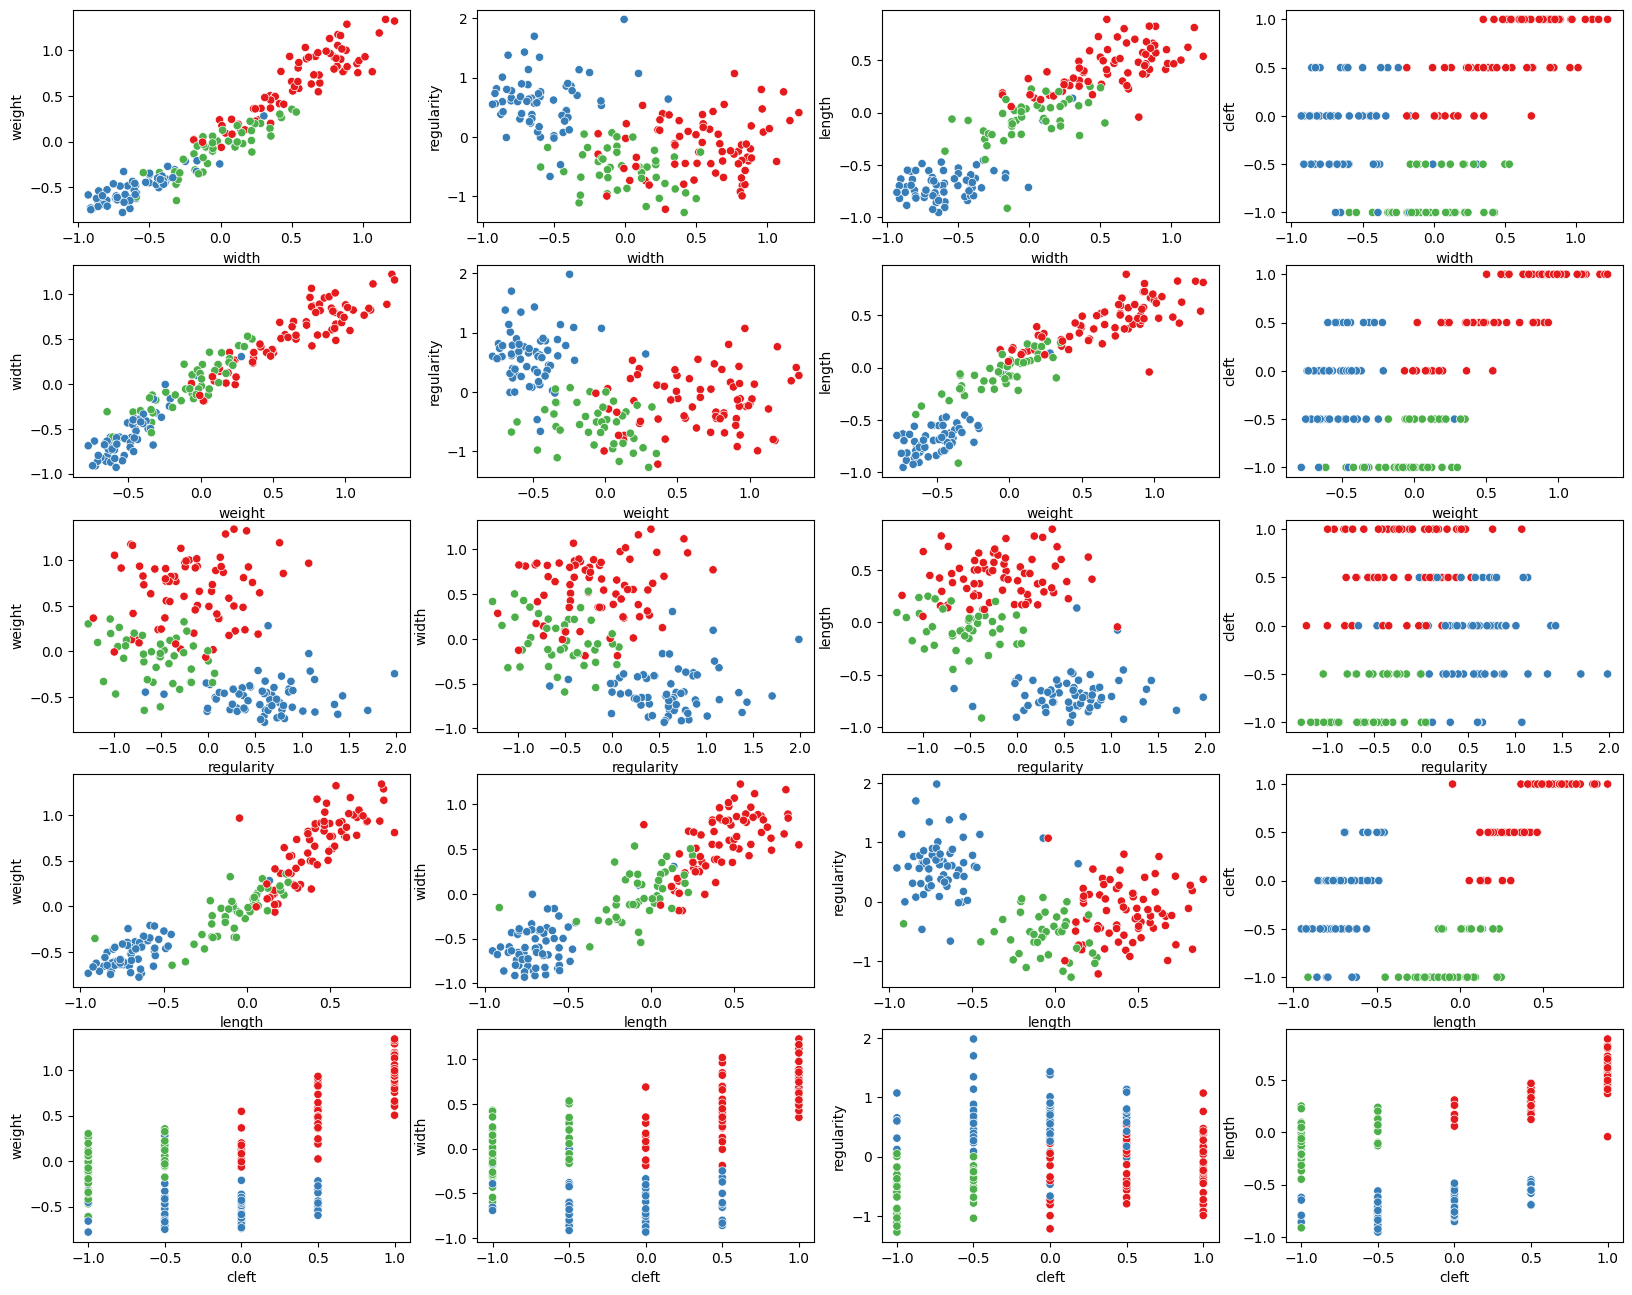

In [98]:
final_fruits = robust_scalar_fruits
n=3
final_cluster=aglomerative_clustering_n(final_fruits, linkage="ward", n_range=[3], distance="euclidean")

final_fruits["cluster"]=final_cluster[3]

mostrar_clusters(final_fruits, n)

In [99]:
from sklearn.cluster import KMeans

def kmeans_for_each_scalar(scalar_models : dict):
    for key in scalar_models.keys():
        Ks = range(1, 8)
        kmeans_per_k = [KMeans(n_clusters=k, random_state=0, n_init=10).fit(scalar_models[key]) for k in Ks]
        silhouette_scores = [silhouette_score(scalar_models[key], model.labels_) for model in kmeans_per_k[1:]]
        inertias = [model.inertia_ for model in kmeans_per_k]

        plt.figure(figsize=(8,4))
        plt.suptitle(str(key), fontsize=25)

        plt.subplot(1, 2, 1)
        plt.plot(Ks[1:], silhouette_scores, "ko-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Silhouette score", fontsize=14)
        #plt.tight_layout()
        #plt.title(str(key))
        plt.subplot(1, 2, 2)
        plt.plot(Ks, inertias, "bo-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Inertia", fontsize=14)
        plt.tight_layout()
        plt.show()


Creamos la función “k_means_for_each_scalar” que nos será útil para crear las gráficas del coeficiente de Silhouette y de codo para todos los métodos que hemos hayamos utilizado. A continuación, la pasaremos nuestros datos por esta función.

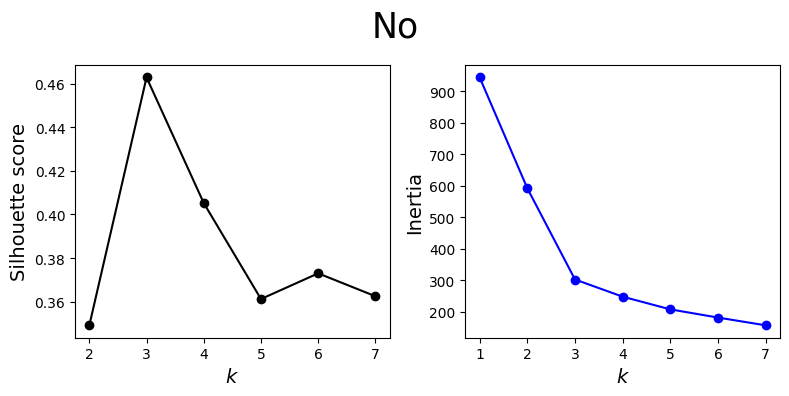

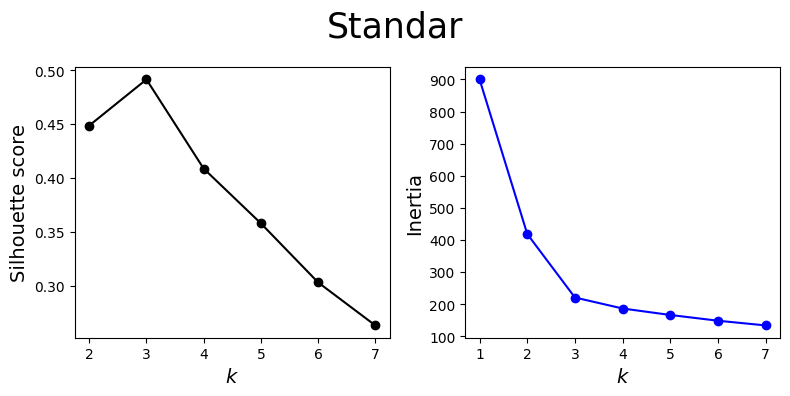

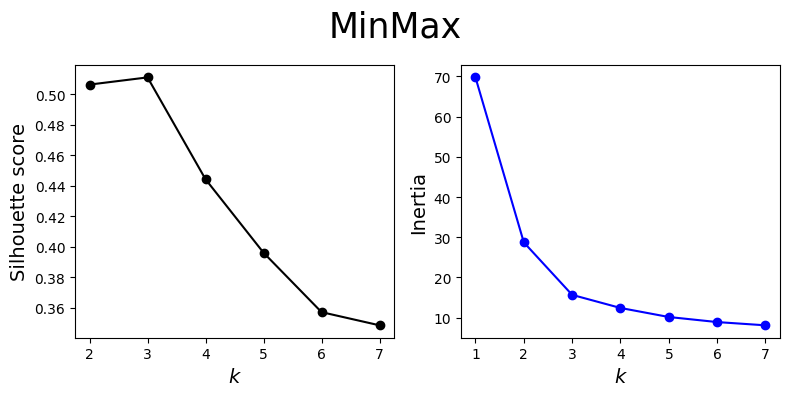

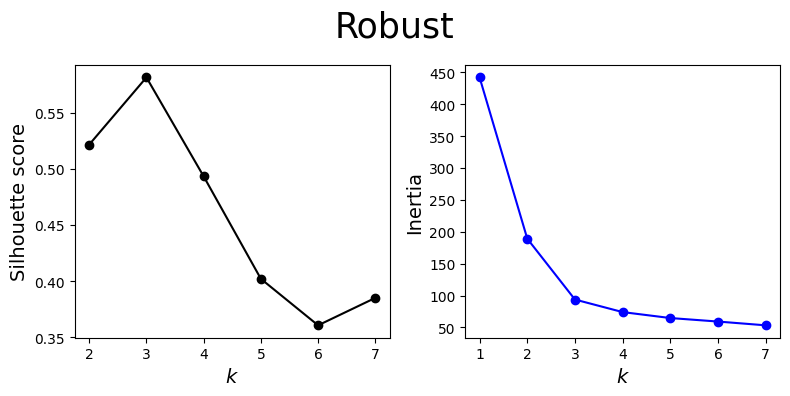

In [100]:
kmeans_for_each_scalar(scalar_models)

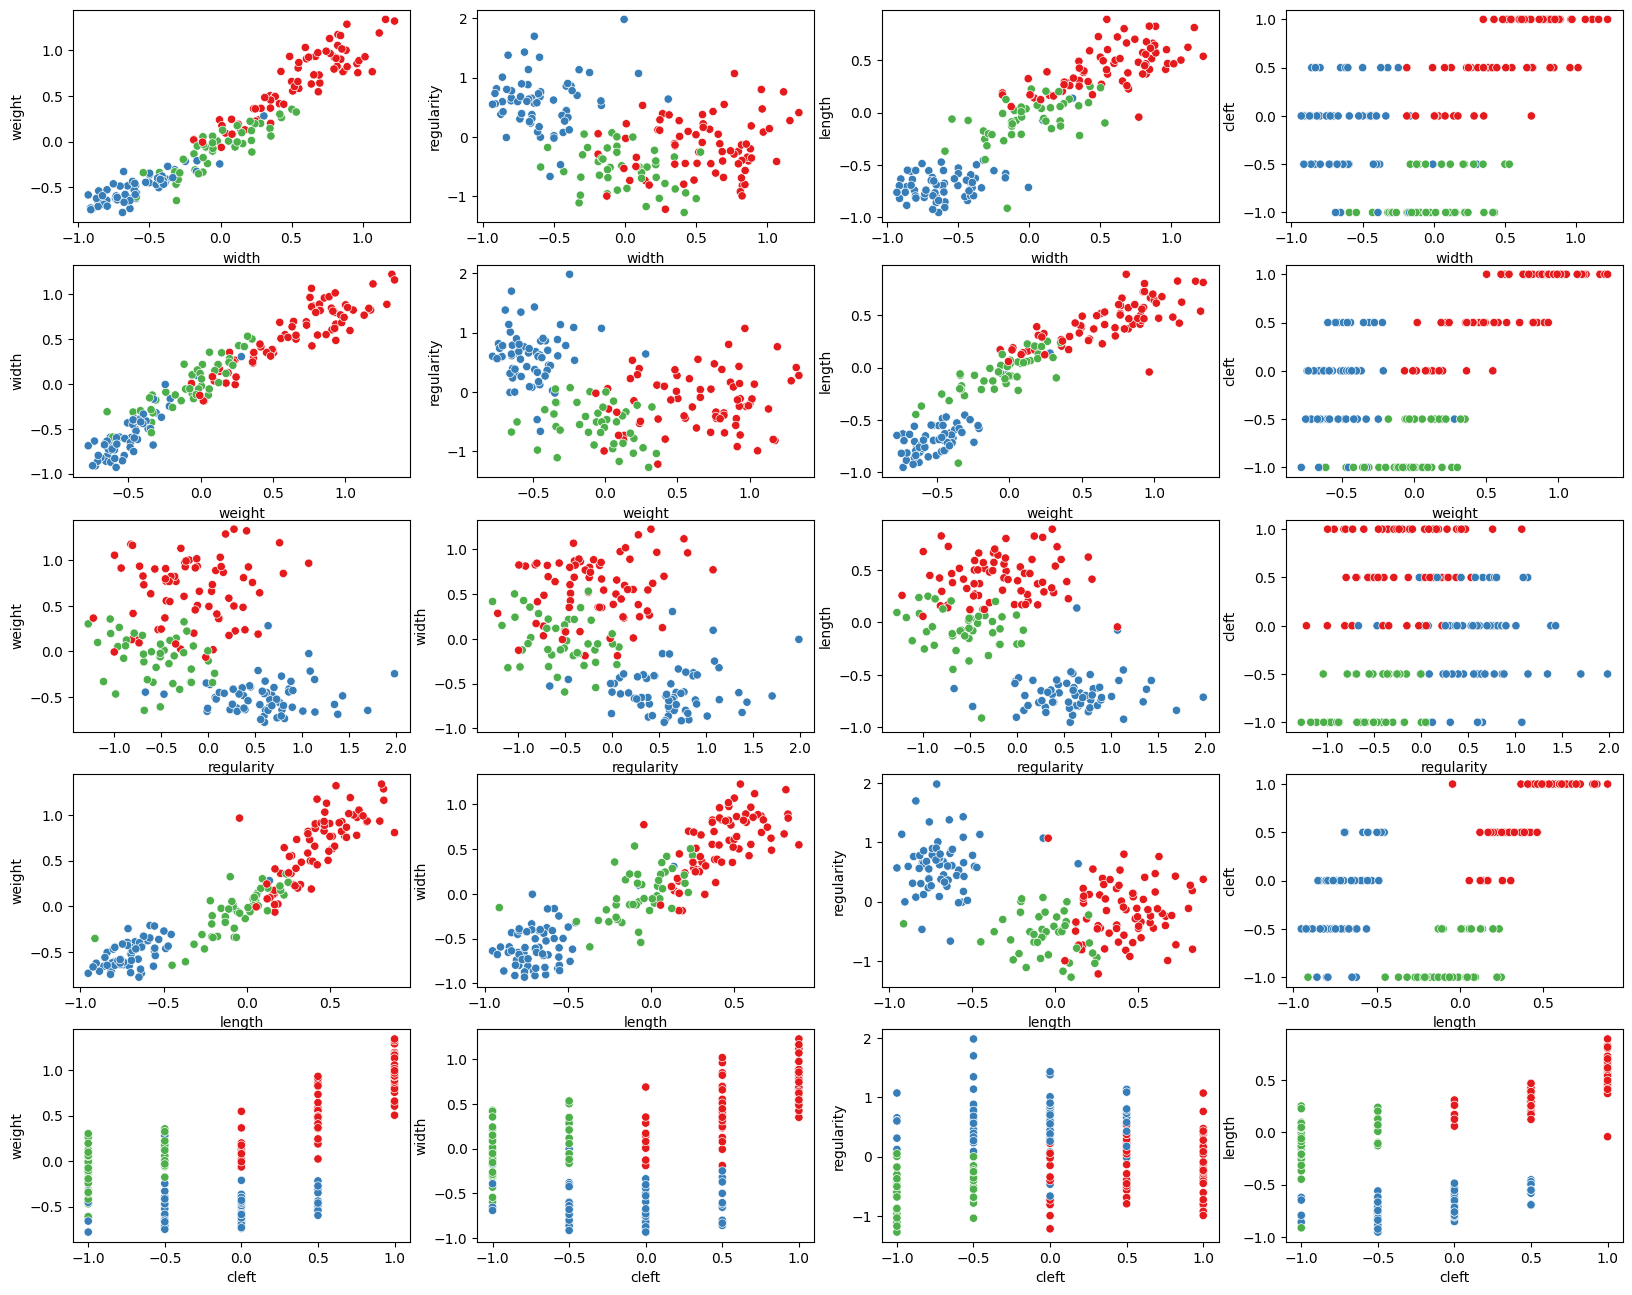

In [101]:
cluster=KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(robust_scalar_fruits)
final_fruits_kmeans=robust_scalar_fruits
final_fruits_kmeans["cluster"]=cluster
mostrar_clusters(df=final_fruits_kmeans, n_paleta=3)
